## Importing Libraries

In [1]:
# Basic Libraries 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso,Ridge,LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# TO see whole data on screen 
pd.set_option("display.max_rows", 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,NaN,0.160,NaN,NaN,NaN,4.130,NaN,NaN,NaN,1.150,NaN,NaN,NaN,5.440,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,5.440,0.000,NaN,NaN,

In [4]:
print("The number of columns in data :-",len(df.columns))
print("\n")
print("The shape of data :-",df.shape)
print("\n")
print("The info of data")
df.info()

The number of columns in data :- 226


The shape of data :- (99999, 226)


The info of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

Here the object type columns contain dates which are actually 12 in total.

In [6]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


there is no duplicate row or entity in it.

In [7]:
# To check how many rows have all missing values
print("Total rows with no single values in it :", df.isnull().all(axis=1).sum())

Total rows with no single values in it : 0


In [8]:
#Function to check percentage of null values present in dataset 
def calnullpercentage(df):
    missing_num= df[df.columns].isna().sum().sort_values(ascending=False)
    missing_perc= (df[df.columns].isna().sum()/len(df)*100).sort_values(ascending=False)
    missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
    missing= missing[missing['Percentage']>0]
    return missing

# Number of columns having null values
print("Number of columns having null values:", len(calnullpercentage(df)))

Number of columns having null values: 166


In [9]:
#check for null values in all categorical columns

obj_columns = df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

print("The number of object columns with null values are:", len(obj_columns))

obj_columns

The number of object columns with null values are: 11


last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [10]:
# Removing following columns. 
# Since they have no relevant data according to problem statement.

df.drop(list(obj_columns.index), axis = 1, inplace = True)

df.drop(['mobile_number', 'circle_id', 'last_date_of_month_6'], axis = 1, inplace = True)


In [11]:
#check for null values in all numeric columns
num_columns = df.select_dtypes(include='float').isnull().sum()[df.select_dtypes(include='float').isnull().sum()>0]

print("The number of number columns with null values are:", len(num_columns))

num_columns

The number of number columns with null values are: 155


loc_og_t2o_mou         1018
std_og_t2o_mou         1018
loc_ic_t2o_mou         1018
onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8       5378
loc_og_t2f_mou_9       7745
loc_og_t2c_mou_6       3937
loc_og_t2c_mou_7       3859
loc_og_t2c_mou_8       5378
loc_og_t2c_mou_9       7745
loc_og_mou_6        

In [12]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.000,98981.000,98981.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96

In [13]:
# defining function for calculation of null values and 
# their percentage level in the descending order.
def nan_counter(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total null', 'Percent'])
    
    print(missing_data)

# using defined function.
nan_counter(df)

                    Total null  Percent
max_rech_data_6          74846   74.847
total_rech_data_6        74846   74.847
count_rech_2g_6          74846   74.847
fb_user_6                74846   74.847
count_rech_3g_6          74846   74.847
av_rech_amt_data_6       74846   74.847
arpu_3g_6                74846   74.847
arpu_2g_6                74846   74.847
night_pck_user_6         74846   74.847
max_rech_data_7          74428   74.429
total_rech_data_7        74428   74.429
count_rech_2g_7          74428   74.429
count_rech_3g_7          74428   74.429
av_rech_amt_data_7       74428   74.429
arpu_3g_7                74428   74.429
arpu_2g_7                74428   74.429
night_pck_user_7         74428   74.429
fb_user_7                74428   74.429
arpu_2g_9                74077   74.078
count_rech_2g_9          74077   74.078
total_rech_data_9        74077   74.078
fb_user_9                74077   74.078
arpu_3g_9                74077   74.078
av_rech_amt_data_9       74077   74.078


<AxesSubplot:>

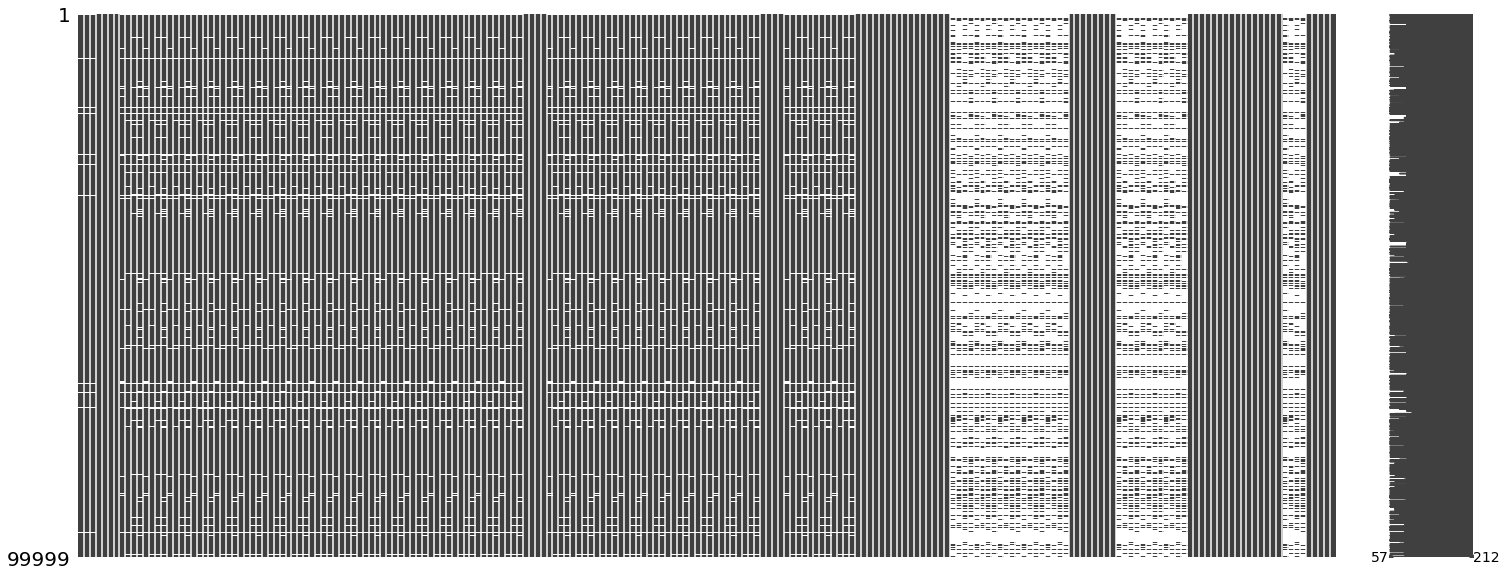

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
#Summary and checking outliers
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.000,98981.000,98981.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96

## Step 2: Data Cleaning

In [16]:
# Before removing columns
df.shape

(99999, 212)

In [17]:
# Dropping all the columns which have '0' in whole column.
# as it will not add any weightage to our work and also it will be waste of time to use them. 
df = df.replace(0,np.nan).dropna(axis=1,how="all")
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,NaN,NaN,NaN,4.130,NaN,NaN,NaN,1.150,NaN,NaN,NaN,5.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,3.000,2.000,6.000,362.000,252.000,252.000,NaN,252.000,252.000,252.000,NaN,252.000,252.000,252.000,NaN,1.000,1.000,1.000,NaN,252.000,252.000,252.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,NaN,252.000,252.000,252.000,NaN,30.130,1.320,5.750,NaN,83.570,150.760,109.610,NaN,212.170,212.170,212.170,NaN,212.170,212.170,212.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,NaN,968,30.400,NaN,101.200,3.580
1,34.047,355.074,268.321,86.285,24.110,78.680,7.680,18.340,15.740,99.840,304.760,53.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.88

In [18]:
# After removing columns 
df.shape

(99999, 201)

### Imputing 0 in place of null values in numeric columns.

In [19]:
# Imputing 0 for columns which have Nan values in it. 

df=df.replace(np.nan, 0)


In [20]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.000,0.000,0.000,4.130,0.000,0.000,0.000,1.150,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,2.000,6.000,362.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,0.000,212.170,212.170,212.170,0.000,0.000,0.00

<AxesSubplot:>

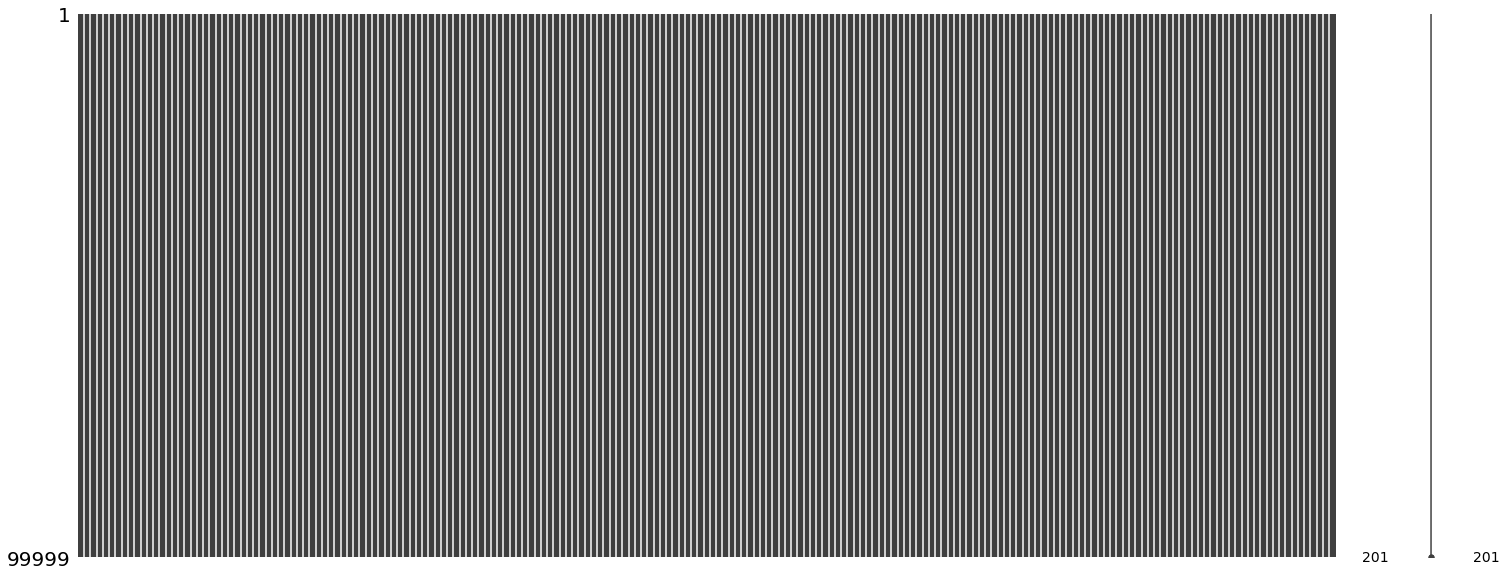

In [21]:
msno.matrix(df)

In [22]:
# using defined function for counting null values in columns
nan_counter(df)

                    Total null  Percent
arpu_6                       0    0.000
total_rech_data_8            0    0.000
max_rech_amt_6               0    0.000
max_rech_amt_7               0    0.000
max_rech_amt_8               0    0.000
max_rech_amt_9               0    0.000
last_day_rch_amt_6           0    0.000
last_day_rch_amt_7           0    0.000
last_day_rch_amt_8           0    0.000
last_day_rch_amt_9           0    0.000
total_rech_data_6            0    0.000
total_rech_data_7            0    0.000
total_rech_data_9            0    0.000
std_ic_mou_7                 0    0.000
max_rech_data_6              0    0.000
max_rech_data_7              0    0.000
max_rech_data_8              0    0.000
max_rech_data_9              0    0.000
count_rech_2g_6              0    0.000
count_rech_2g_7              0    0.000
count_rech_2g_8              0    0.000
count_rech_2g_9              0    0.000
count_rech_3g_6              0    0.000
count_rech_3g_7              0    0.000


In [23]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending = False)

sachet_2g_8         count_rech_2g_8      0.983
sachet_2g_7         count_rech_2g_7      0.983
sachet_2g_6         count_rech_2g_6      0.981
sachet_2g_9         count_rech_2g_9      0.979
total_rech_amt_8    arpu_8               0.956
total_rech_amt_6    arpu_6               0.953
total_rech_amt_9    arpu_9               0.952
total_rech_amt_7    arpu_7               0.952
arpu_2g_6           arpu_3g_6            0.942
arpu_2g_7           arpu_3g_7            0.940
arpu_2g_8           arpu_3g_8            0.936
isd_og_mou_8        isd_og_mou_7         0.931
count_rech_2g_6     total_rech_data_6    0.922
count_rech_2g_7     total_rech_data_7    0.922
count_rech_2g_8     total_rech_data_8    0.921
isd_og_mou_7        isd_og_mou_6         0.913
sachet_2g_7         total_rech_data_7    0.909
sachet_2g_8         total_rech_data_8    0.909
sachet_2g_6         total_rech_data_6    0.907
total_ic_mou_9      loc_ic_mou_9         0.907
isd_og_mou_8        isd_og_mou_6         0.906
total_ic_mou_

In [24]:
#Rename Columns with numbers as others are.
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                   'jul_vbc_3g': 'vbc_3g_7', 
                   'aug_vbc_3g': 'vbc_3g_8', 
                   'sep_vbc_3g': 'vbc_3g_9'}, 
                        inplace=True)

## Filter high-value customers

to do so, we gonna add new columns for total recharge amount in the good phase, [6th and 7th month]

In [25]:
df["total_data_rech_amt_6"] = df["total_rech_data_6"] * df['av_rech_amt_data_6']

#df['amt_data_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']

df['total_amt_spnd_6'] = df['total_data_rech_amt_6'] + df['total_rech_amt_6']

We concat data from :-
   - "total_rech_data_6" which shows, how many times a person did recharge in 6th month.
   - "av_rech_amt_data_6" which shows, the average amount of money a person spent in 6th month.

In [26]:
# Same for the 7th month.
df["total_data_rech_amt_7"] = df["total_rech_data_7"] * df['av_rech_amt_data_7']

#df['amt_data_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']

df['total_amt_spnd_7'] = df['total_data_rech_amt_7'] + df['total_rech_amt_7']

In [27]:
# Taking average of total amount spent in 6th and 7th month by the customer.
df['avg_amt_6&7'] = (df['total_amt_spnd_6'] + df['total_amt_spnd_7'])/2

In [28]:
# Filtering high paying customer in data by applying 70% cutoff criteria.
df=df.loc[(df['avg_amt_6&7'] >= np.percentile(df['avg_amt_6&7'], 70))]

As mentioned, we need to predict churn only for the high-value customers.

**Define high-value customers as follows:** Those who have recharged with an amount more than or equal to X,
[*where X is the 70th percentile of the average recharge amount in the first two months (the good phase)*].

### Dropping Some columns

In [29]:
# as we extracted data out of it. we can simply drop the columns which we used.
df.drop(['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6', 
         'total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7'], axis = 1, inplace = True)

# also 'total_rech_amt' is highly correlative with "arpu" like about 95%
# also 'total_rech_data' is highly correlative with "count_rech_2g" like about 89%
# also 'av_rech_amt_data' is highly correlative with "arpu_2g" like (80 to 83 %)

In [30]:
# this is the dataset segmen we need to work on. as per the problem statement. (top 30% customers)
df.shape

(30001, 200)

In [31]:
df.head(15)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_amt_spnd_6,total_data_rech_amt_7,total_amt_spnd_7,avg_amt_6&7
0,197.385,214.816,213.803,21.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.000,0.000,0.000,4.130,0.000,0.000,0.000,1.150,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,2.000,6.000,252.000,0.000,252.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,252.000,0.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,0.000,212.170,212.170,212.170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.

In [32]:
# the second thing we need to do according to problem statement is to take difference. from the from following columns.
df[['arpu_6', 'arpu_7', 'arpu_8'
    #, "arpu_diff"
   ]]

# we gonna take average of 'good’ phase [6th and 7th month]. 
# and then take difference from 'action' phase [8th month].

,arpu_6,arpu_7,arpu_8
0,197.385,214.816,213.803
7,1069.180,1349.850,3171.480
8,378.721,492.223,137.362
21,514.453,597.753,637.760
23,74.350,193.897,366.966
...,...,...,...
99981,384.316,255.405,393.474
99984,328.594,202.966,118.707
99986,644.973,455.228,564.334
99988,312.558,512.932,402.080


In [33]:
# according problem statement. 
# finding difference between good phase and action phase 

df['arpu_diff'] = df['arpu_8'] - ((df['arpu_6'] + df['arpu_7'])/2)

In [34]:
df.shape

(30001, 201)

### Tagging churners and removing non-requiring attributes of the churn phase

tagging the churned customers: 
- churn=1 
- non churn/else = 0 

based on the 9th month data as: 
   - Those who have not made any calls (either incoming or outgoing) 
   AND 
   - have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners 

In [35]:
# Deriving some columns 
# 1) to identify those who have made any calls or not made any calls
df['total_calls_mou_9'] = df['total_ic_mou_9'] + df['total_og_mou_9']

# 2) to identify those who have used internet or not.
df['total_internet_mb_9'] = df['vol_2g_mb_9'] + df['vol_3g_mb_9']

In [36]:
#churned customers (churn=1, else 0) 
df['churn'] = np.where(df[['total_calls_mou_9','total_internet_mb_9']]
                       .sum(axis=1) == 0, 1,0)

In [37]:
df.shape

(30001, 204)

In [38]:
df['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

After tagging churners, *removing all the attributes* corresponding to the **churn phase (all attributes having ‘ _9’, etc. in their names)**

In [39]:
colNames = df.columns[df.columns.str.contains(pat = '_9')] 

print(colNames)
print("number of columns about to drop :", len(colNames))

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_calls_mou_9', 'total_internet_mb_9'], dtype='object')
number of columns about to drop : 52


In [40]:
len(colNames)

52

In [41]:
df.drop(colNames, axis = 1, inplace = True)

In [42]:
df.shape

(30001, 152)

In [43]:
## Churn against non churn
pd.DataFrame(round(df['churn'].value_counts(normalize=True)*100,3))

,churn
0,91.864
1,8.136


In [44]:
df[['churn']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   churn   30001 non-null  int32
dtypes: int32(1)
memory usage: 351.6 KB


In [45]:
df.count()

arpu_6                   30001
arpu_7                   30001
arpu_8                   30001
onnet_mou_6              30001
onnet_mou_7              30001
onnet_mou_8              30001
offnet_mou_6             30001
offnet_mou_7             30001
offnet_mou_8             30001
roam_ic_mou_6            30001
roam_ic_mou_7            30001
roam_ic_mou_8            30001
roam_og_mou_6            30001
roam_og_mou_7            30001
roam_og_mou_8            30001
loc_og_t2t_mou_6         30001
loc_og_t2t_mou_7         30001
loc_og_t2t_mou_8         30001
loc_og_t2m_mou_6         30001
loc_og_t2m_mou_7         30001
loc_og_t2m_mou_8         30001
loc_og_t2f_mou_6         30001
loc_og_t2f_mou_7         30001
loc_og_t2f_mou_8         30001
loc_og_t2c_mou_6         30001
loc_og_t2c_mou_7         30001
loc_og_t2c_mou_8         30001
loc_og_mou_6             30001
loc_og_mou_7             30001
loc_og_mou_8             30001
std_og_t2t_mou_6         30001
std_og_t2t_mou_7         30001
std_og_t

approximately 8% customers churned and 92% customers not churned. 

Also, we can see class imbalance which we will see later.

## EDA

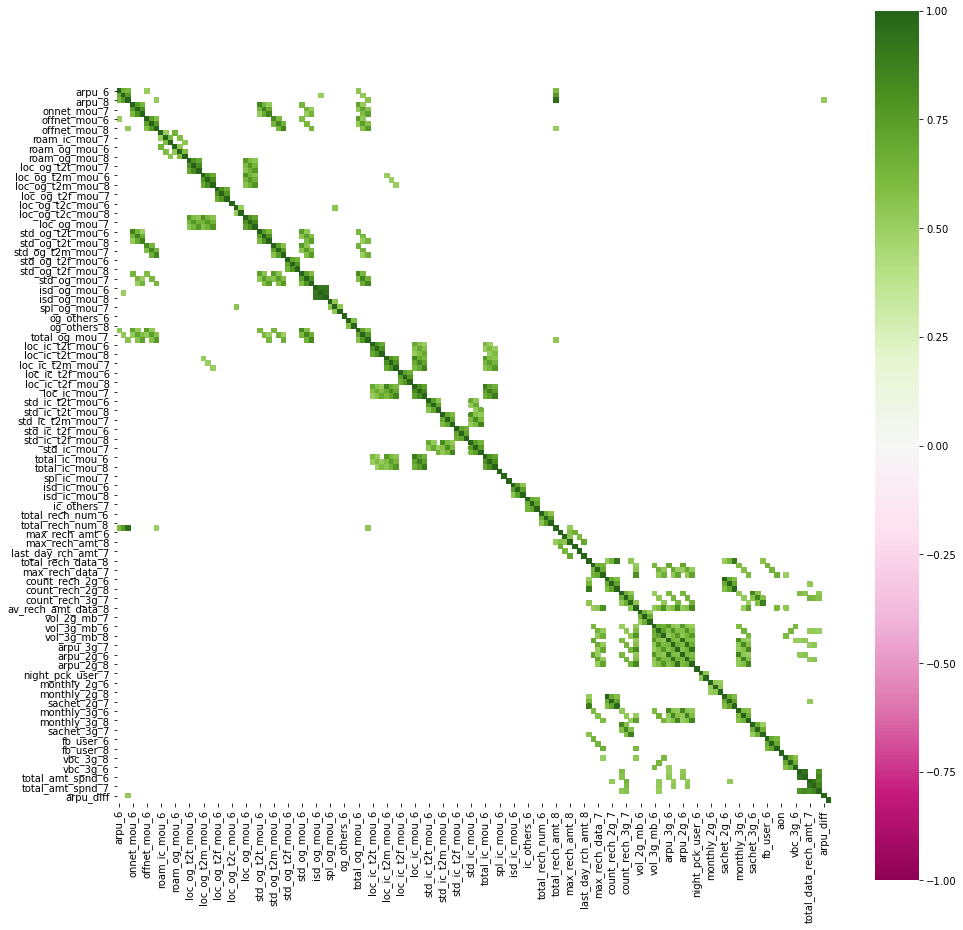

In [46]:
# Heat Map

# naive way 
corr = df.corr()

# corr
plt.figure(figsize=(16,16))
# Triangle Matrix
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# plotting correlations on a heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            #mask=mask,
            cmap='PiYG', vmax=1.0, vmin=-1.0, 
            #annot=True, annot_kws={"size": 8}, 
            square=True);

In [47]:
# Highly correlated data in a Data Frame Manner.
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
corr_df = pd.DataFrame(cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending = False))

corr_df = corr_df.reset_index()

corr_df.rename(columns = {'level_0' : 'column_1',
                        'level_1' : 'column_2',
                        0 : 'value'}, inplace = True)
corr_df

corr_df = corr_df.sort_values(by = ['column_1', 'column_2' ,'value'], ascending = True)

corr_df

,column_1,column_2,value
5,arpu_2g_6,arpu_3g_6,0.940
272,arpu_2g_6,arpu_3g_7,0.602
241,arpu_2g_6,count_rech_3g_6,0.619
123,arpu_2g_6,max_rech_data_6,0.716
87,arpu_2g_6,vol_3g_mb_6,0.757
236,arpu_2g_7,arpu_2g_6,0.624
268,arpu_2g_7,arpu_3g_6,0.605
7,arpu_2g_7,arpu_3g_7,0.936
203,arpu_2g_7,arpu_3g_8,0.641
214,arpu_2g_7,count_rech_3g_7,0.636


As we can see, there are a lot of variables which are corelated with each other.

we going to handle that corelated fundamental later with the help of PCA

## Numeric Column analysis 
with respect to Churn column(target Variable)

In [48]:
# Function to show values on bar plot
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

In [49]:
# Function to plot distribution plot for months(6,7 and 8) for churn and non churn customers. 
# Also, plotting box plot and strip plot for the same.
def dist_box_plot(df,col1,col2,col3):    
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col1], bins = 40, ax = axes[0], kde = False,\
                      color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col1], bins = 40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==1][col2], bins = 40, ax = axes[2], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col2], bins = 40, ax = axes[3], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
    ax=sns.boxplot(x='churn', y=col1, data=df,ax=axes[0])
    ax=sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray",ax=axes[0])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col1,fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col2, data=df,ax=axes[1])
    ax=sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray",ax=axes[1])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col2,fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col3], bins = 40, ax = axes[0], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col3],bins=40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col3, data=df,ax=axes[2])
    ax=sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray",ax=axes[2])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col3,fontweight='bold',size=20)
    plt.show()

### arpu 
(Average Revenue per user)

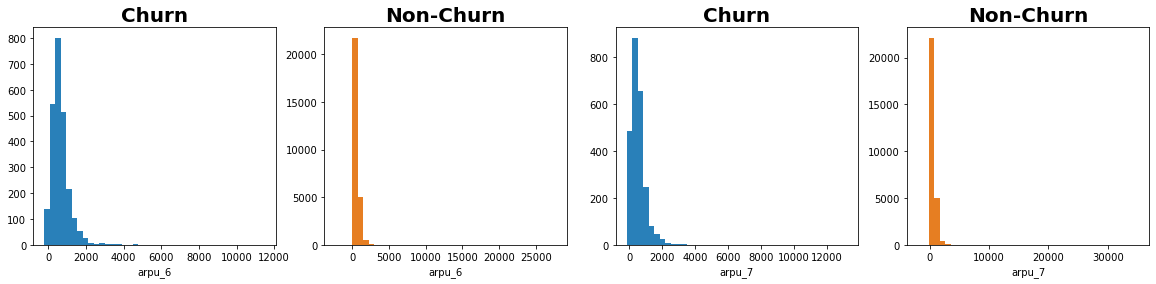

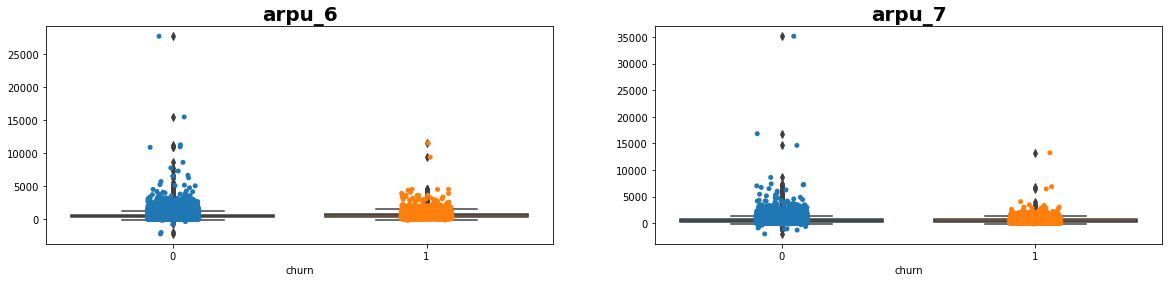

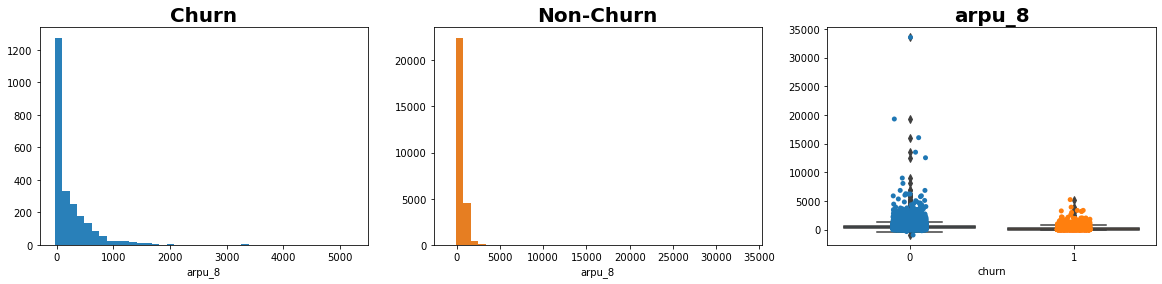

In [50]:
dist_box_plot(df,'arpu_6','arpu_7','arpu_8')

As we can see, average revenue per customer is decreasing for churn customers as we moving from 6th month to 8th month.

Also there are lots of outlier exists in revenue as some customers might using higher data and recharging frequently in 6th and 7th month. but there is no high paying customer (outlier) present in 8th month.

### total_rech_amt
(Total Reacharge Amount)

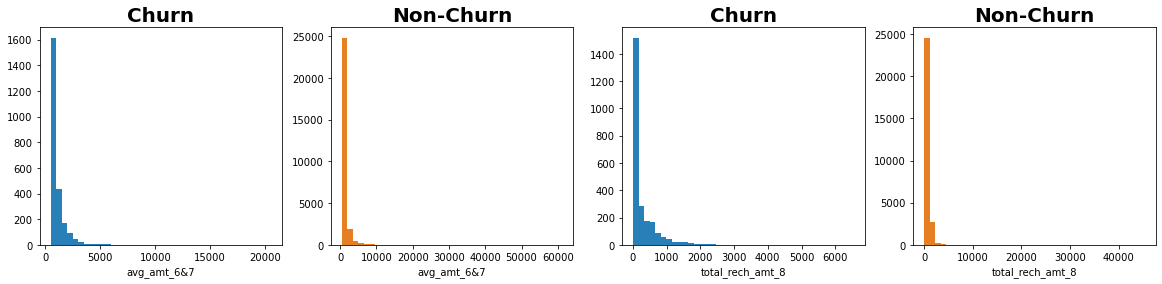

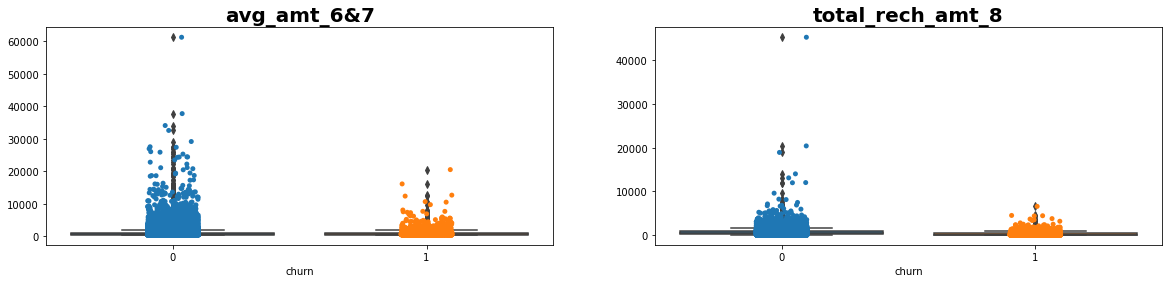

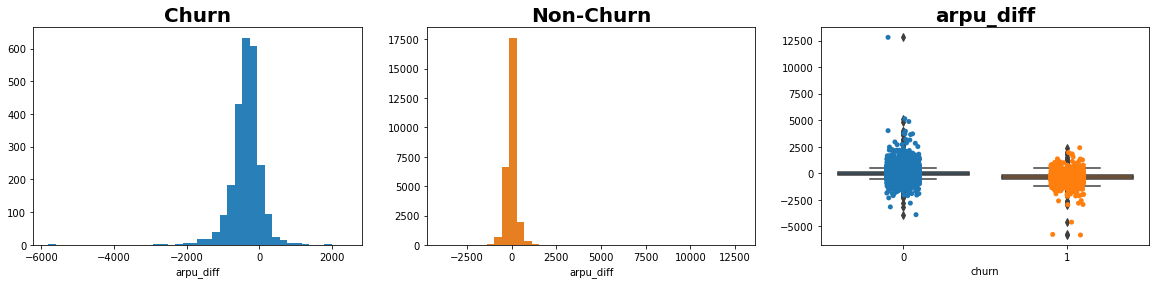

In [51]:
dist_box_plot(df,'avg_amt_6&7','total_rech_amt_8','arpu_diff')

Total recharge amount distribution of 8th month getting decrease from 6th month for Churn customers.

### max_rech_amt 
(Max Reacharge Amount)

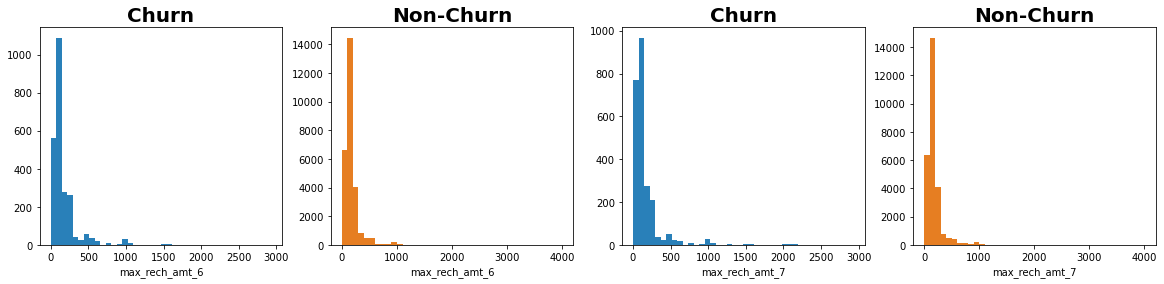

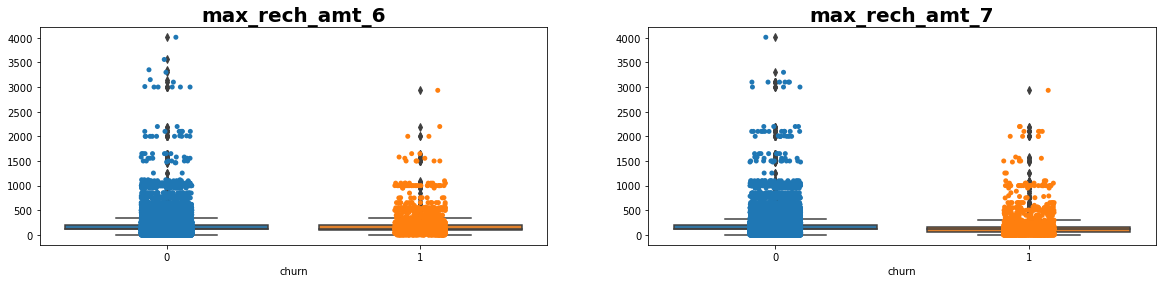

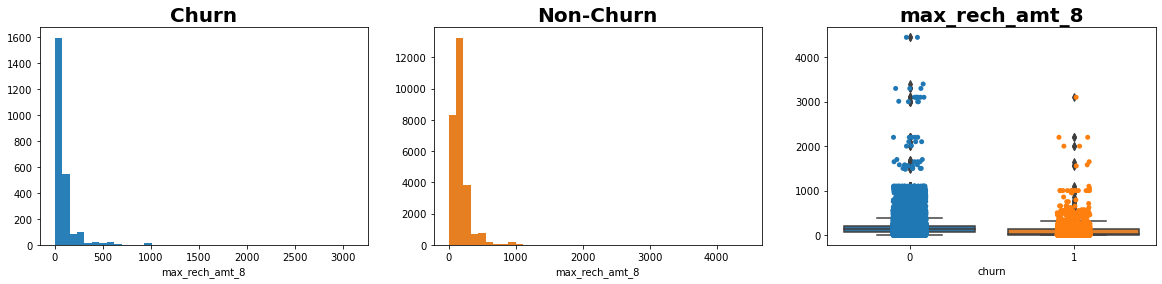

In [52]:
dist_box_plot(df,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

Max Recharge Amount is decreased to 8th month for Churn customers.

### max_rech_data 
(Max Reachrge Data)

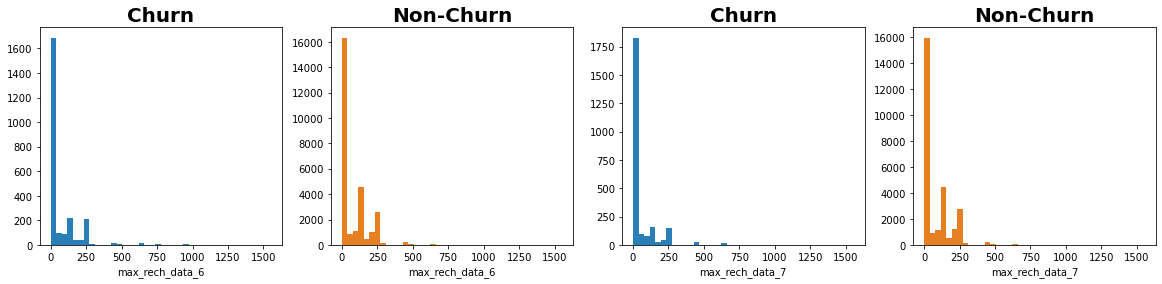

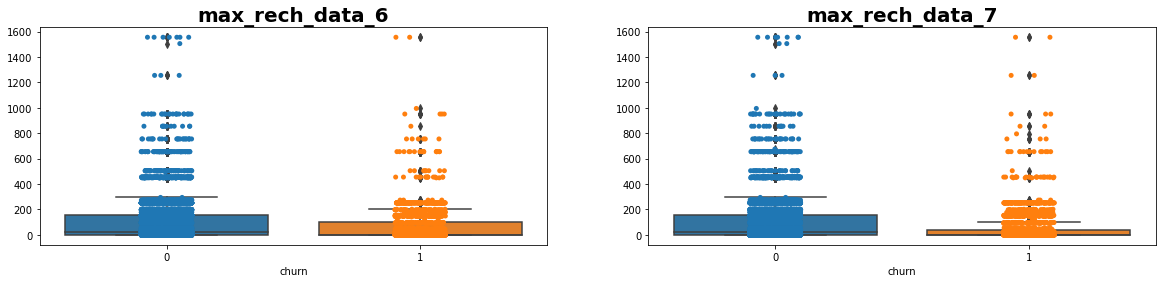

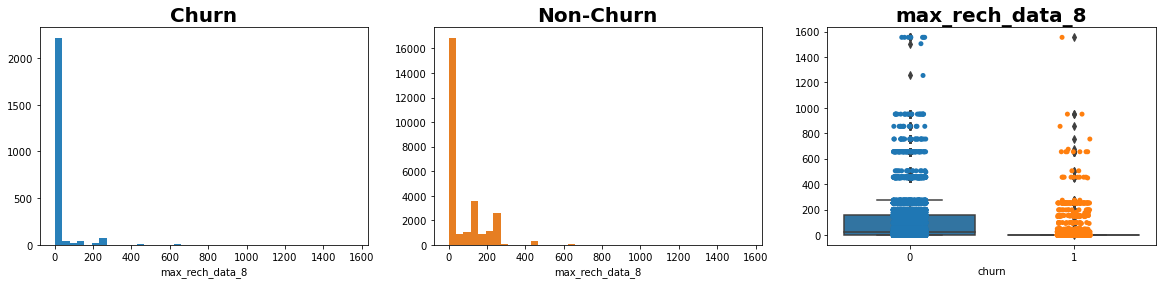

In [53]:
dist_box_plot(df,'max_rech_data_6','max_rech_data_7','max_rech_data_8')

Max recharge data also reduced for 8th month churn customers.

It looks like many customers are using high data as there are huge outliers.

### last_day_rch_amt 
(Last day Reacharge Amount)

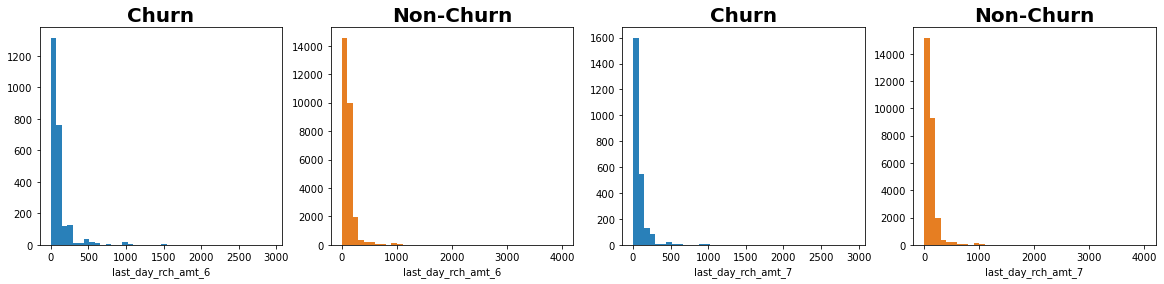

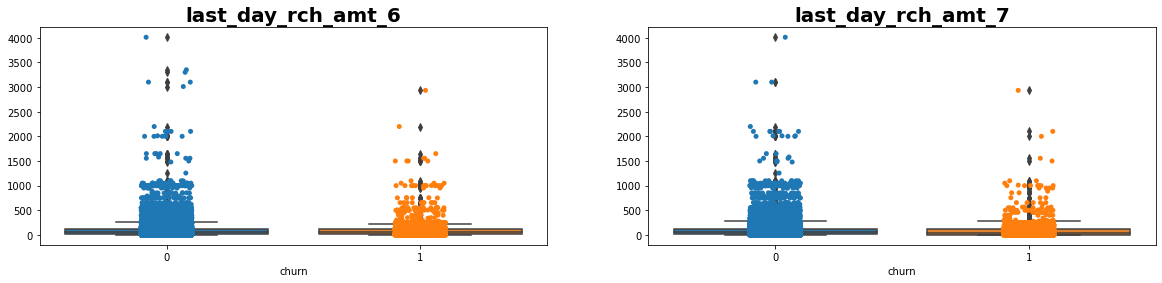

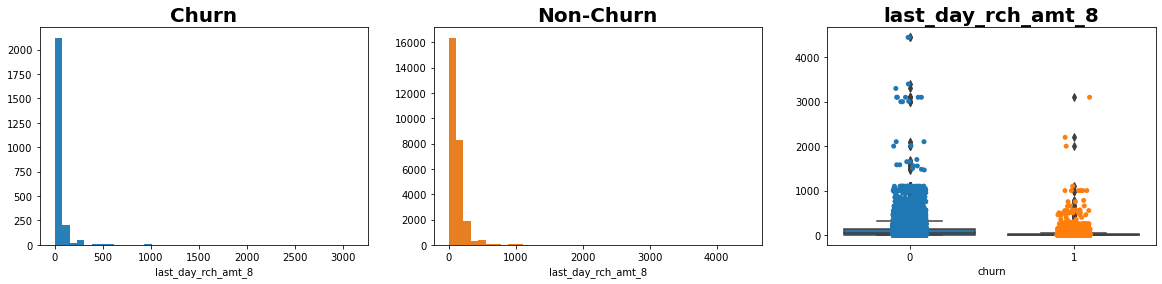

In [54]:
dist_box_plot(df,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

Last day Reacharge decreased to 8th month for churn customers.

### onnnet_mou 
(Minutes of usage for all kind of calls within the same operator network)

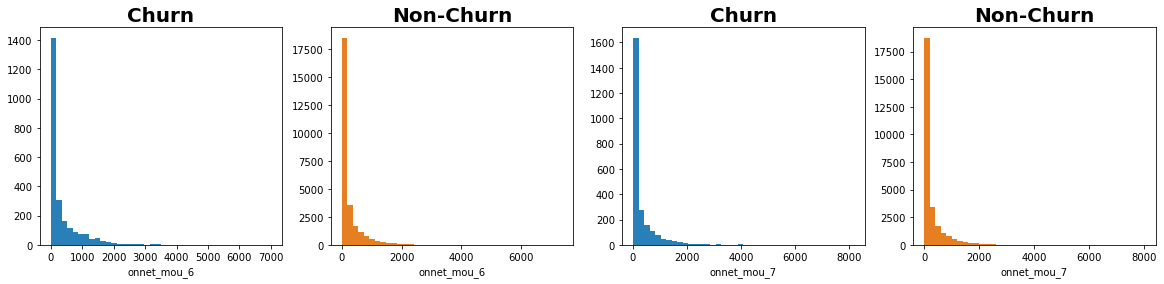

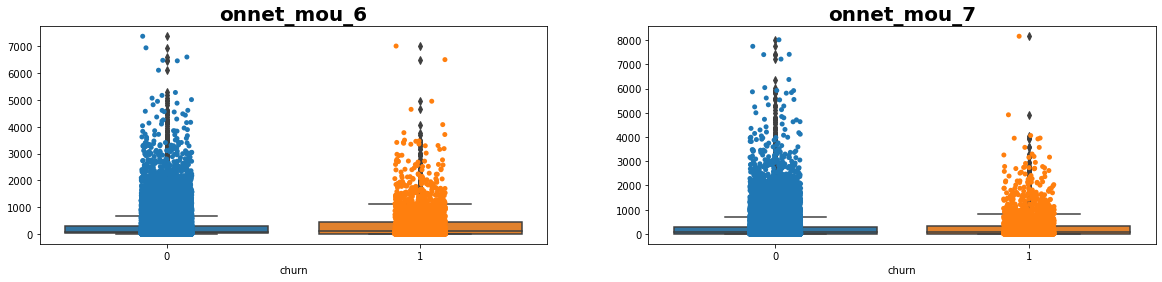

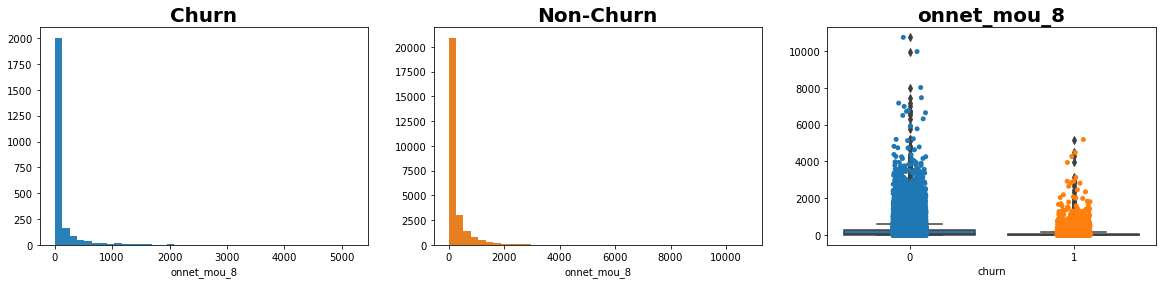

In [55]:
dist_box_plot(df,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

In onnet_mou, minutes of usage is gradually decreasing for churn customers as we moving from 6th month to 8th month.

As compared to 6th and 7th month , in 8th month there is no high minutes of usage (outlier) present.

### offnet_mou 
(Minutes of usage for All kind of calls outside the operator T network)

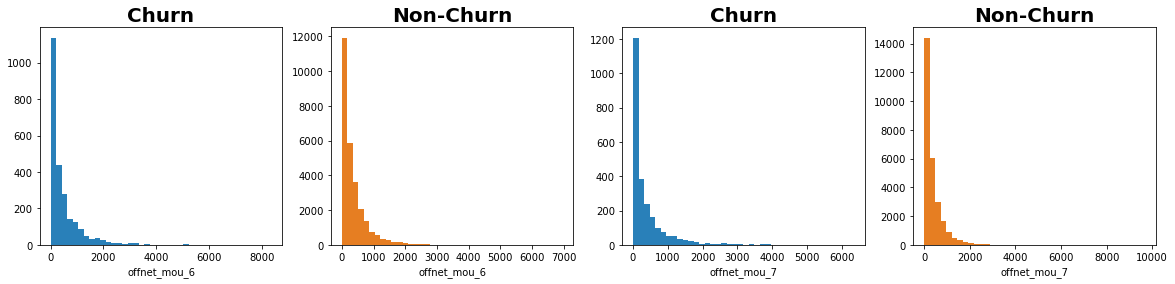

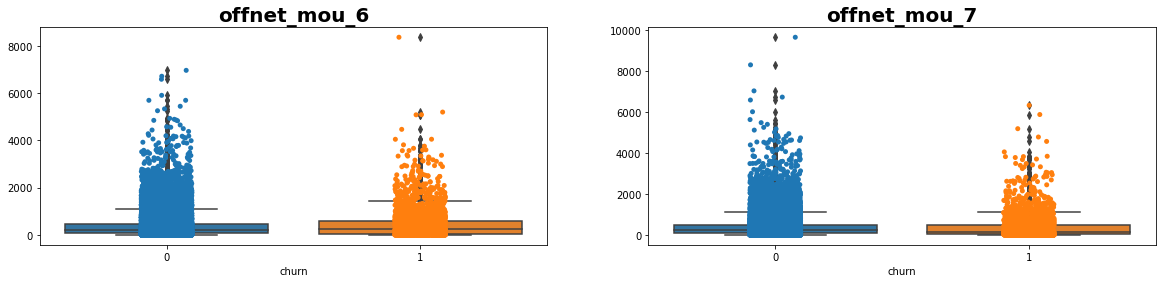

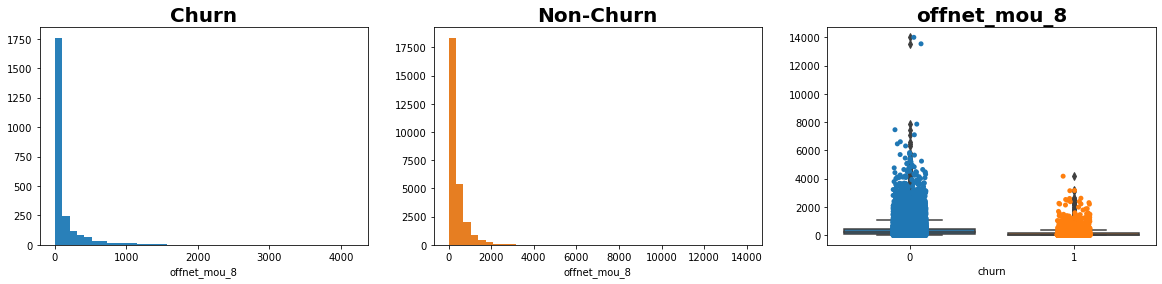

In [56]:
dist_box_plot(df,'offnet_mou_6','offnet_mou_7','offnet_mou_8')

Similarly, in Offnet mou is gradually decreasing for churn customers from 6th month to 8th month.

As compared to 6th and 7th month , in 8th month there is no high minutes of usage (outlier) present.

### loc_og_t2t_mou 
(Minutes of usage within same operator on local outgoing calls)

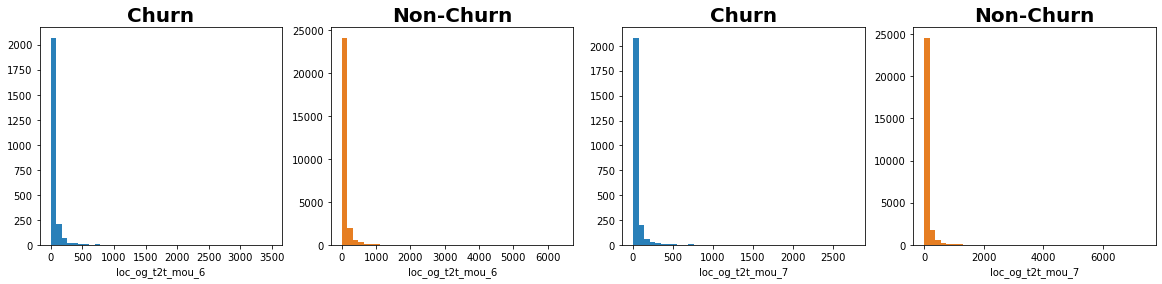

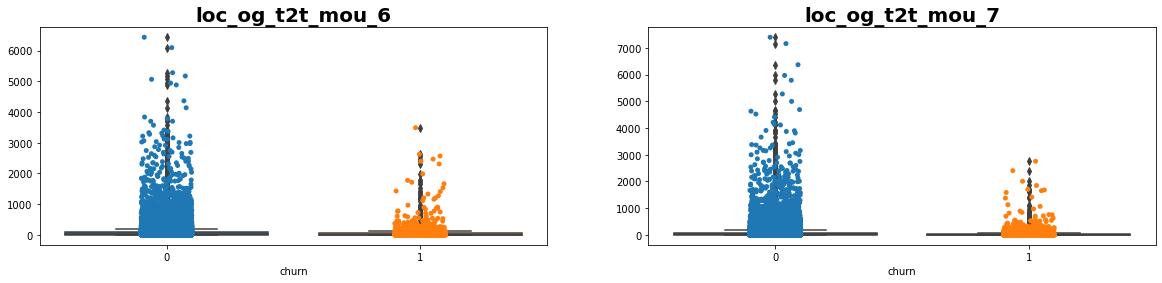

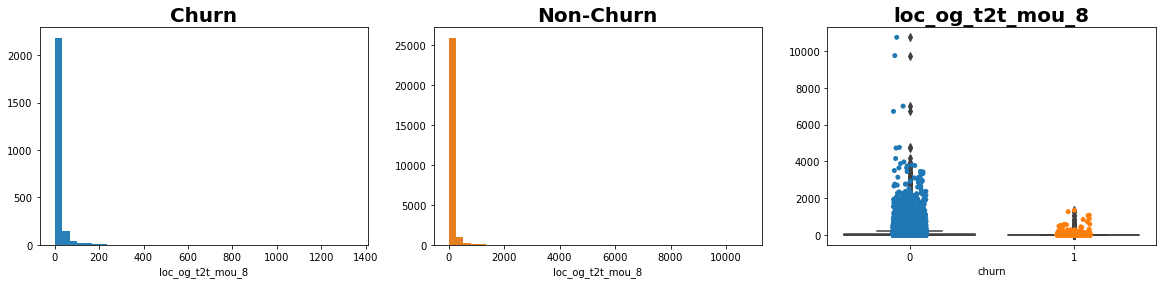

In [57]:
dist_box_plot(df,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

local outgoing call with in same operator has decreased while moving from 6th to 8th month for churn customers.

### loc_ic_t2t_mou 
(Minutes of usage within same operator on local incoming calls)

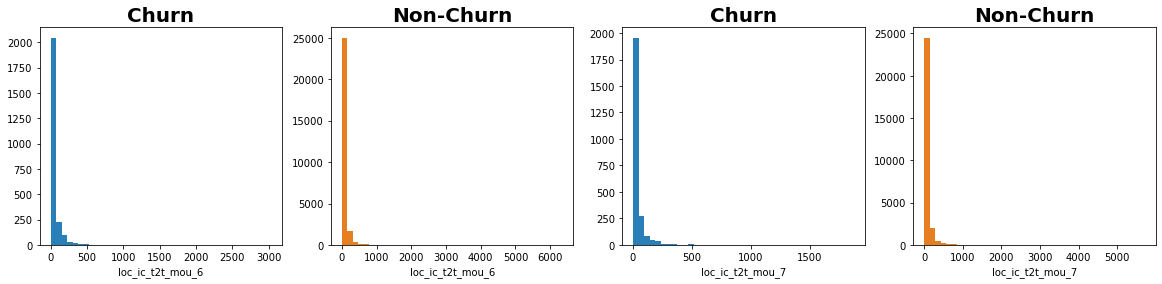

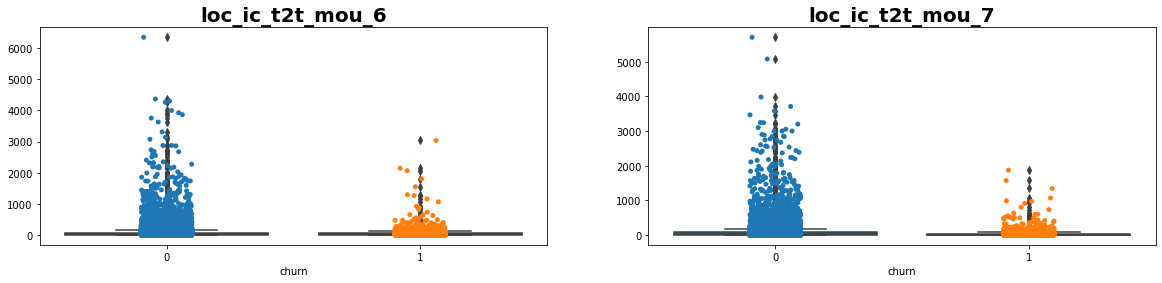

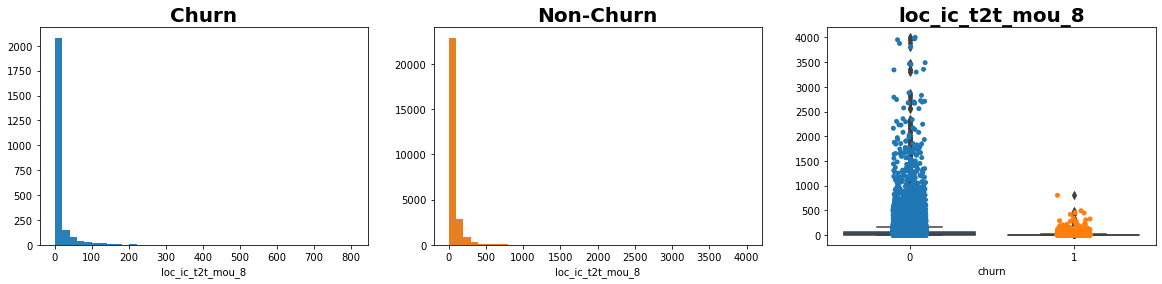

In [58]:
dist_box_plot(df,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8')

Local Incoming calls minutes of usage are reduced in 8th month. Huge outliers for Non churn customers

### loc_og_t2m_mou 
(Minutes of usage from operator T to fixed line T on local outgoing calls)


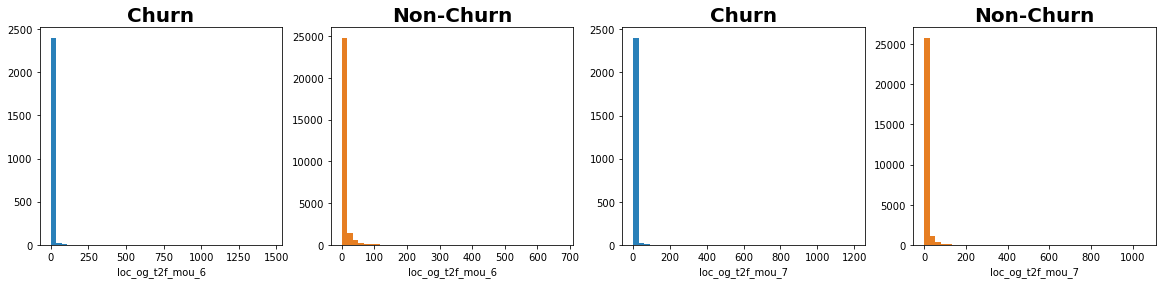

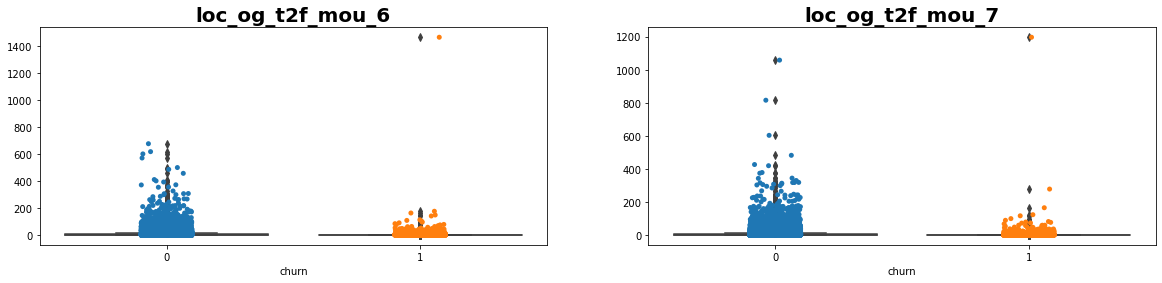

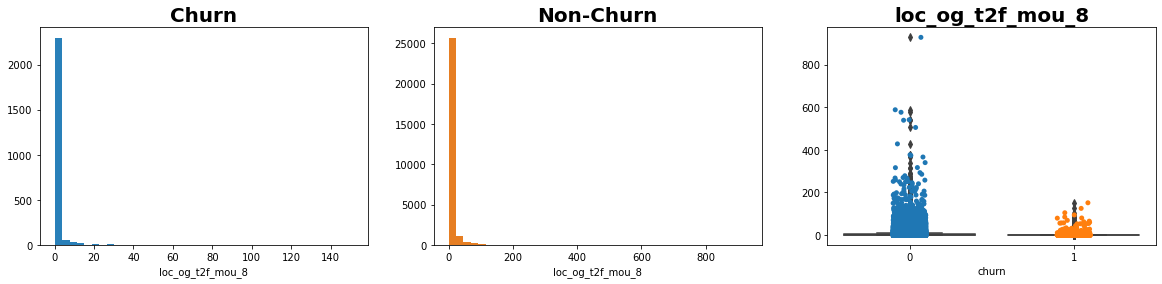

In [59]:
dist_box_plot(df,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8')

As we can clearly see, there are very less mou from operator T to fixed line T on local outgoing calls which means customers prefer calling on mobile more. 

Also there is no outliers present for 8th month (for churn customer) in graph which shows decrease in minutes of usage.

### loc_ic_t2f_mou 
(Minutes of usage from Operator T to fixed lines of T on local incoming calls)

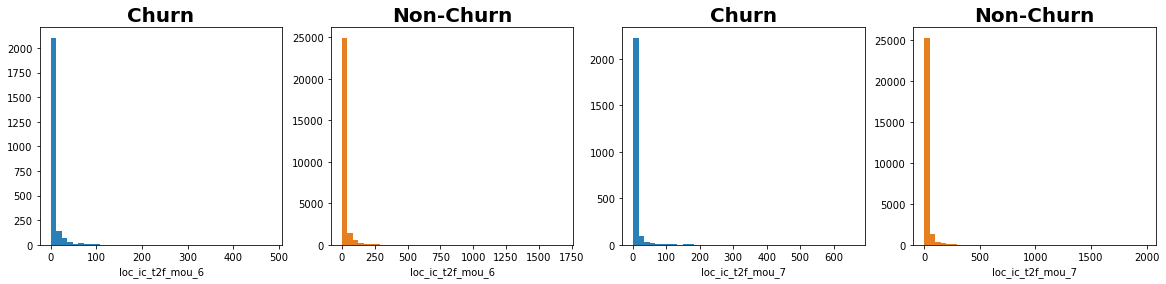

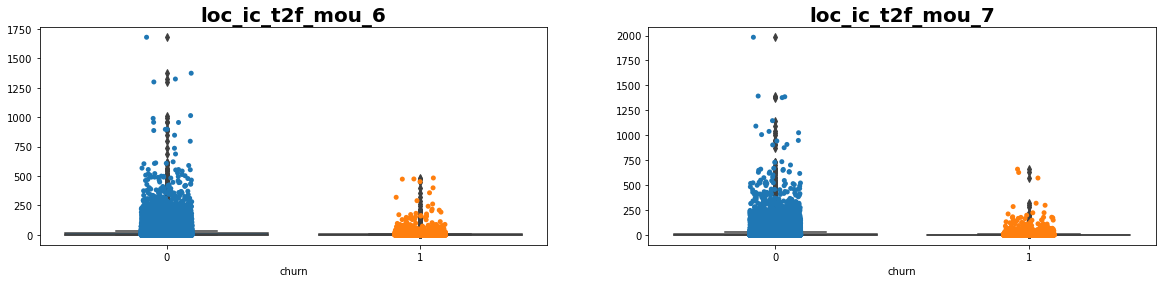

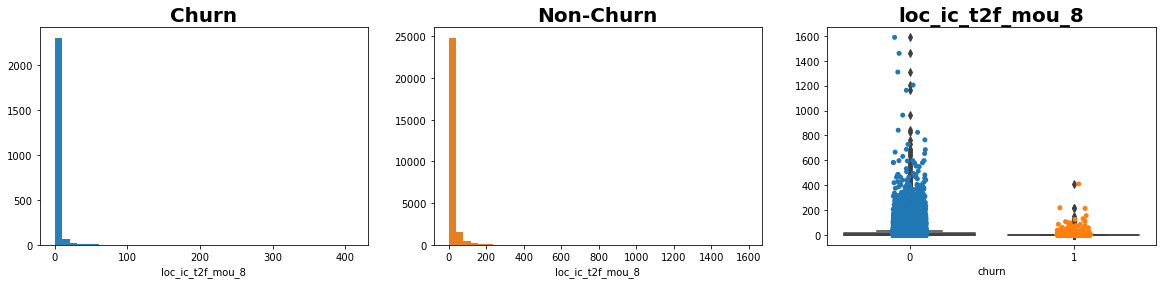

In [60]:
dist_box_plot(df,'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8')

Only few customer are calling to Fixed line. Also mou for fixed lines is decreased for churn customers in 8th month.

### std_og_t2t_mou
(Minutes of usage within same operator on STD outgoing calls)

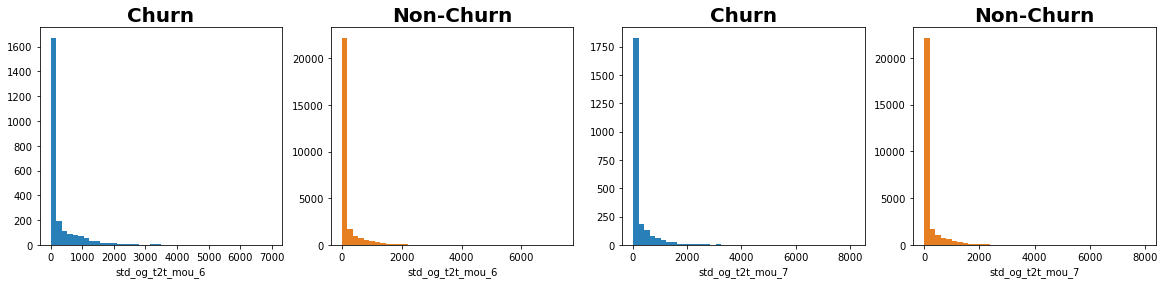

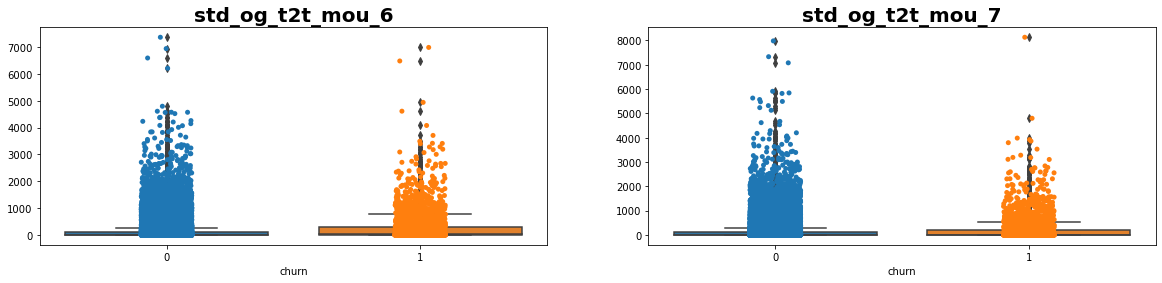

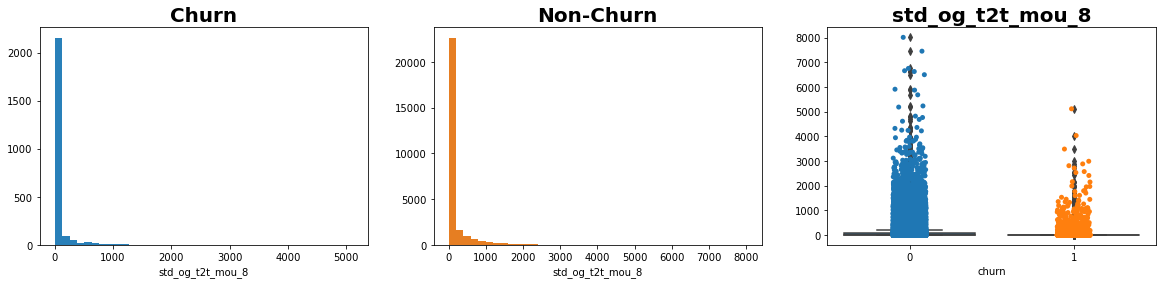

In [61]:
dist_box_plot(df,'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8')

Significant decrease in minutes of usage within same operator on STD outgoing calls for the churn customers from 6th to 8th month .

### isd_og_mou 
(Minutes of usage on ISD outgoing calls)

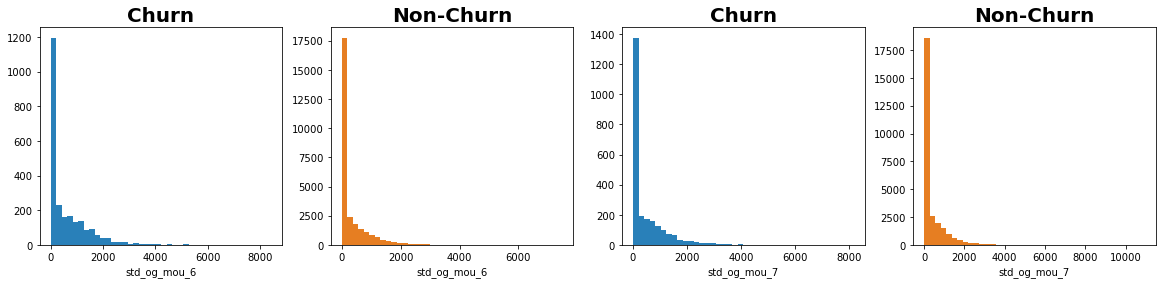

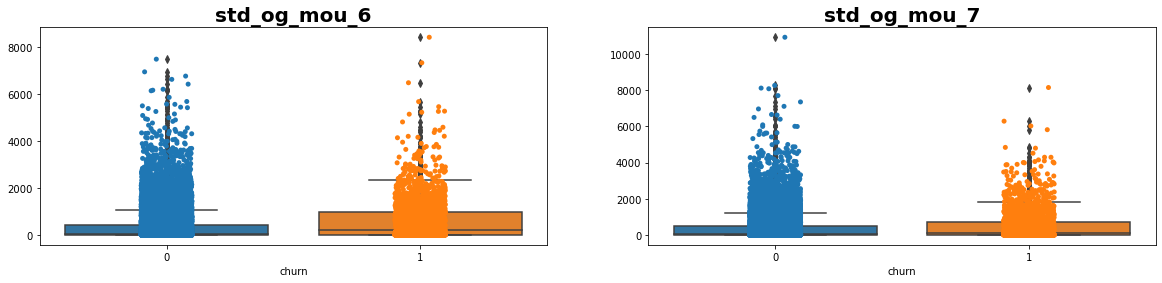

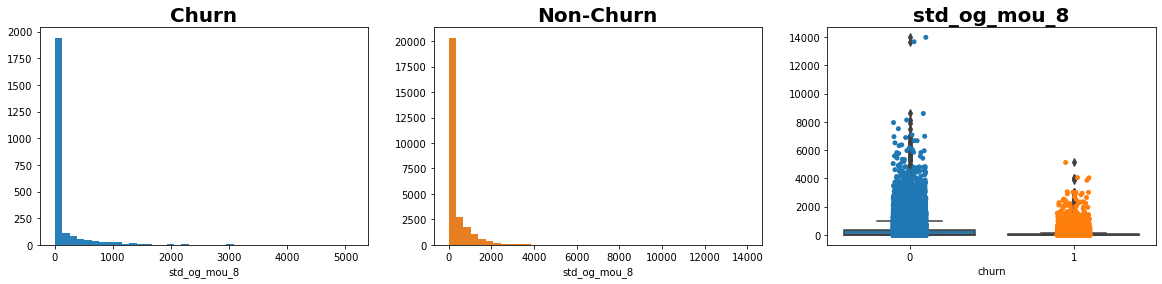

In [62]:
dist_box_plot(df,'std_og_mou_6','std_og_mou_7','std_og_mou_8')

STD outgoing calls has been decreased for 8th month churn customers.

### roam_ic_mou 
(Minutes of usage on roaming incoming calls)

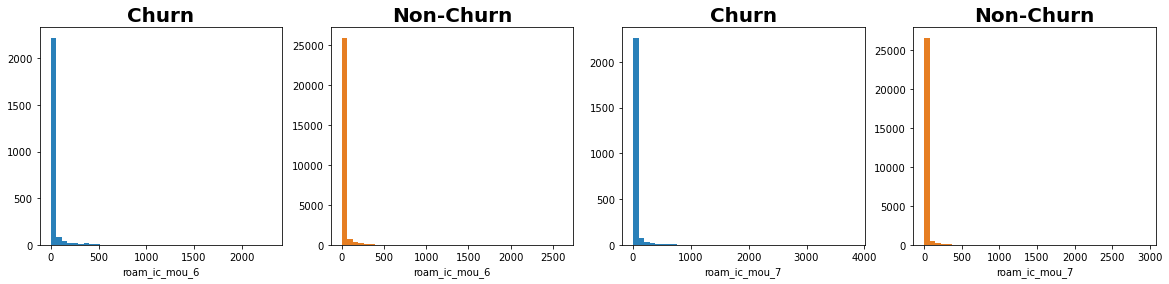

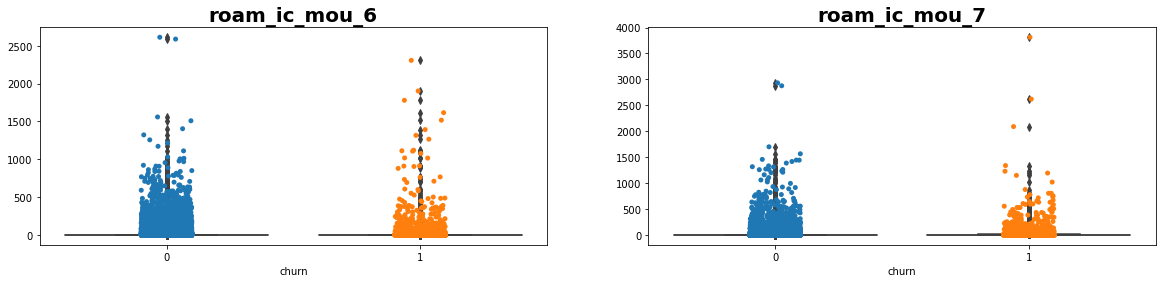

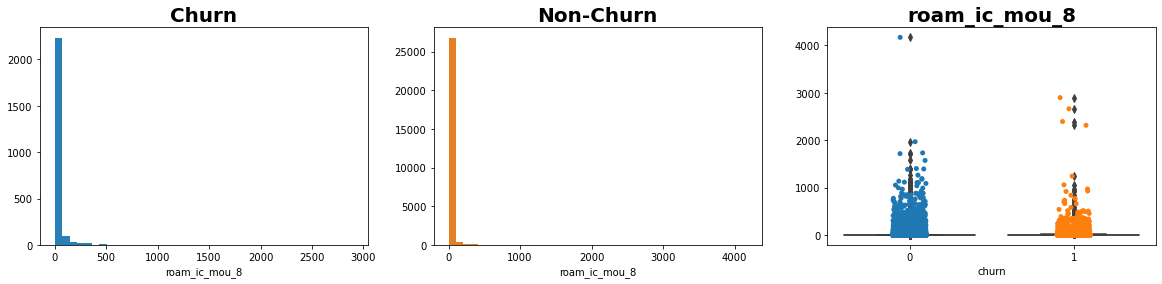

In [63]:
dist_box_plot(df,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')

As compard to above parameters, 
plots for roam_ic_mou, there is no significant change while comparing 6th & 7th month. 

Even in 8th month, for churn customers, graphs shows slight decrease in mou.

### spl_og_mou 
(Minutes of usage on Special calls)

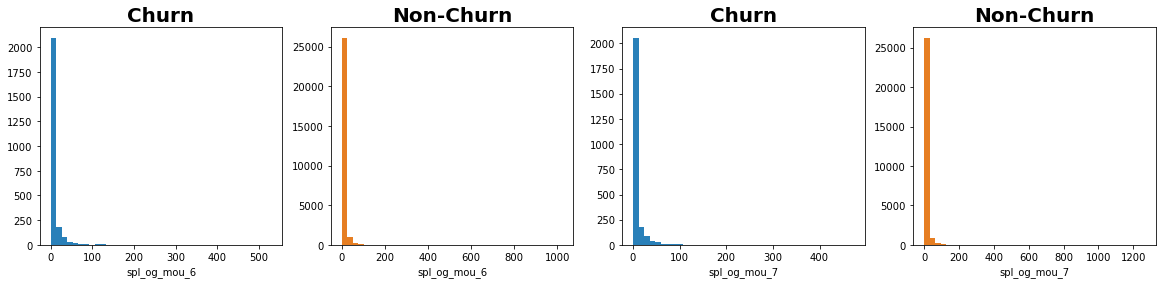

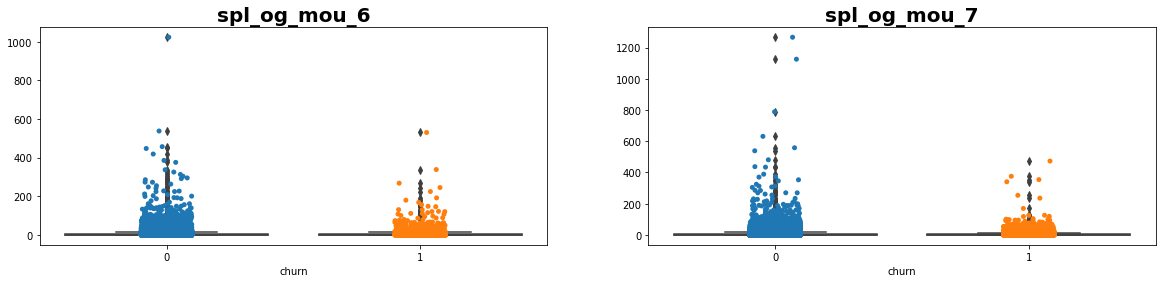

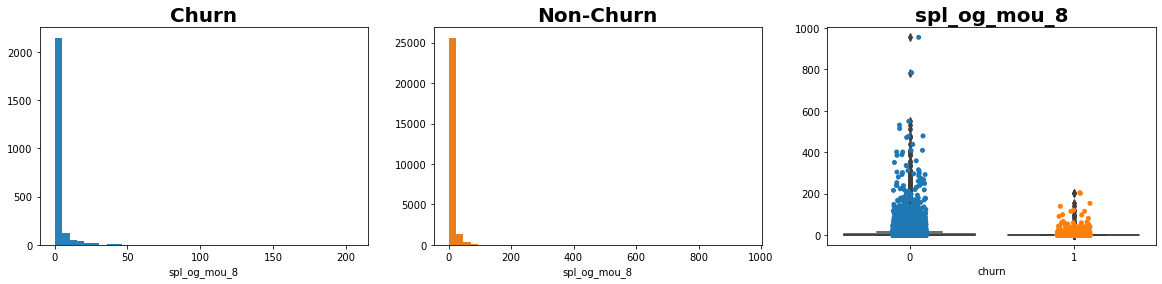

In [64]:
dist_box_plot(df,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')

Less Minutes of usage on Special calls for churn customers in 8th month. There are some customers who are having high minutes of usage.

there is a significant drop which we can notice. As we move from 6th to 8th month, the rate of using special calls service is also decreasing.

### vol_2g_mb 
(2g data volume in Mb)

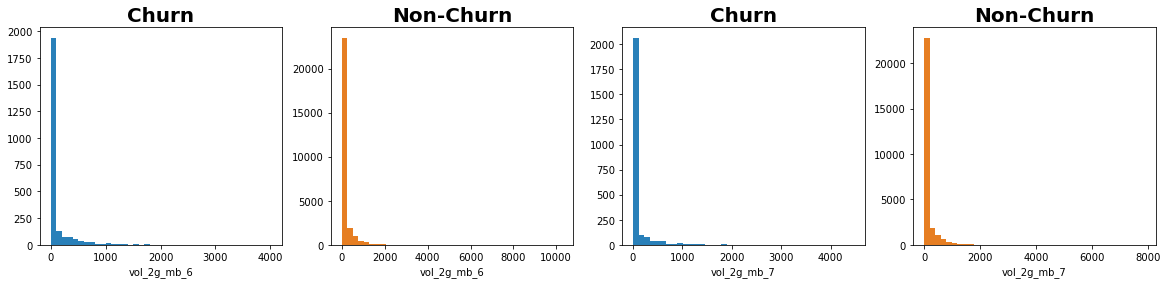

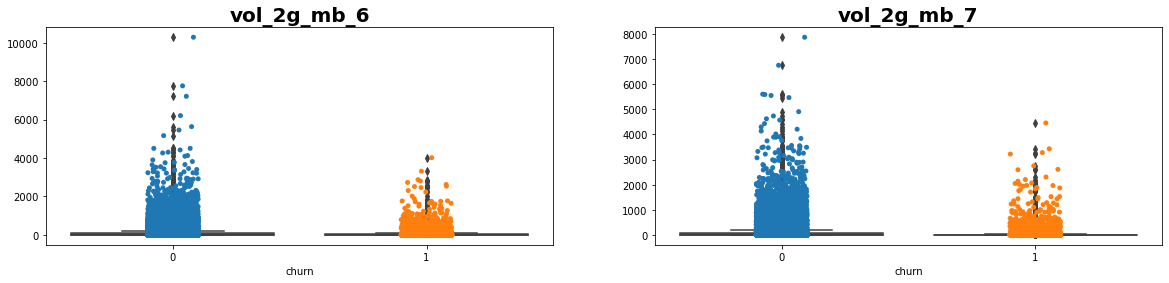

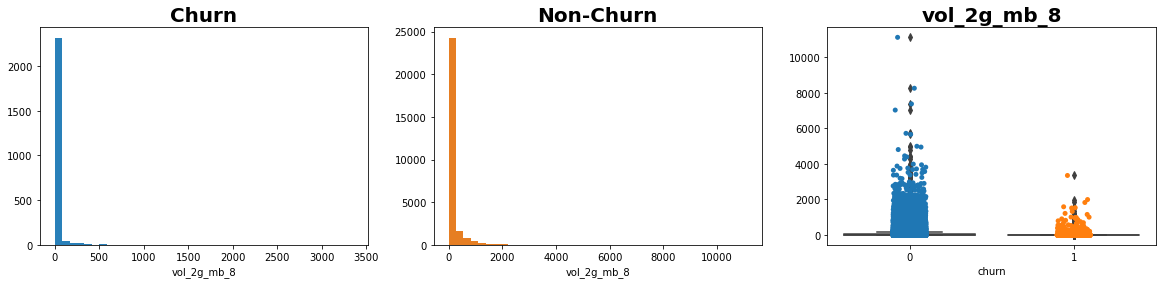

In [65]:
dist_box_plot(df,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

2g data volume in Mb decreased in 8th month for churn customers.

### arpu_2g 
(Avg Revenue per user from 2g data)

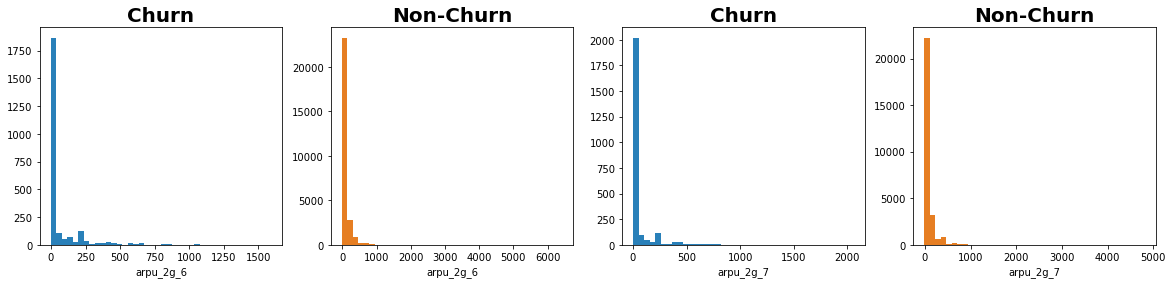

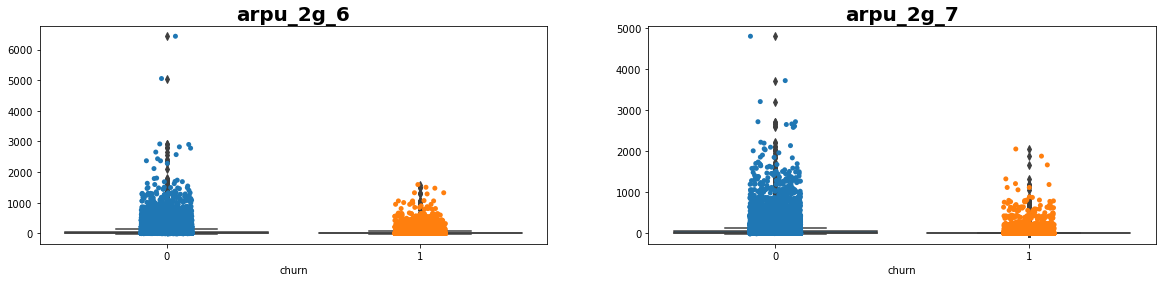

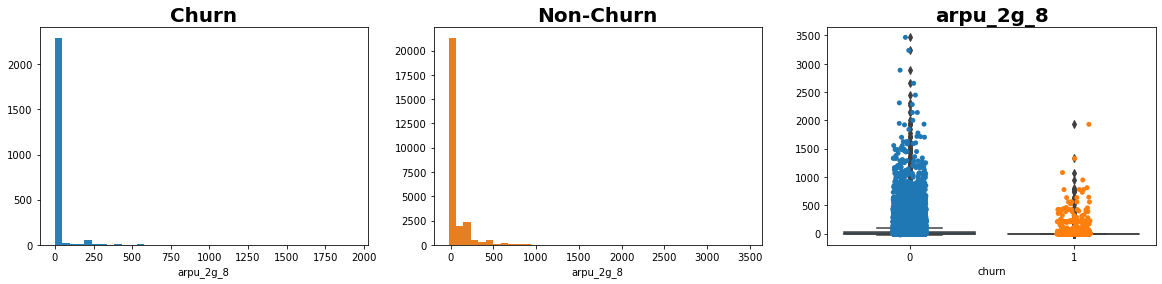

In [66]:
dist_box_plot(df,'arpu_2g_6','arpu_2g_7','arpu_2g_8')

Similalry significant drop in Avg Revenue per user for 2g data for churn customers.

### vol_3g_mb 
(3g data volume in Mb)

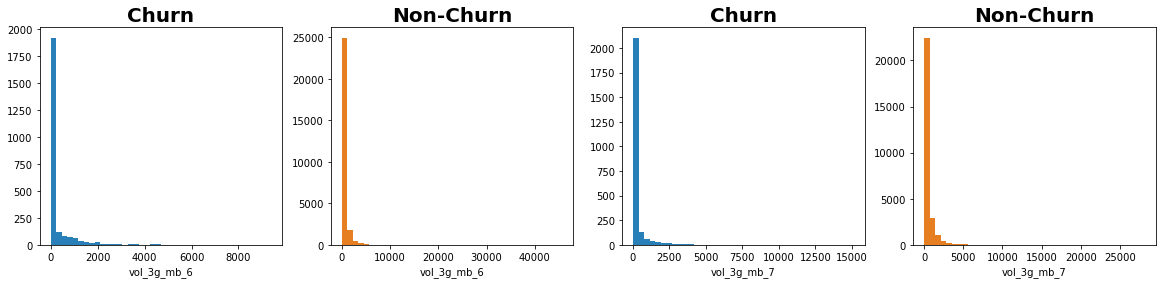

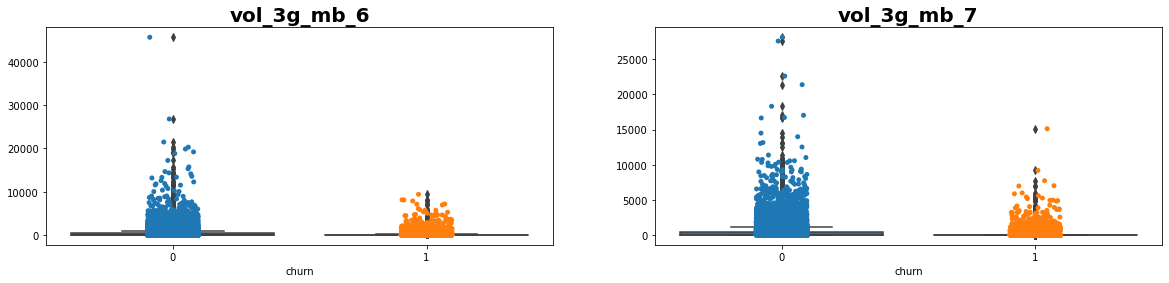

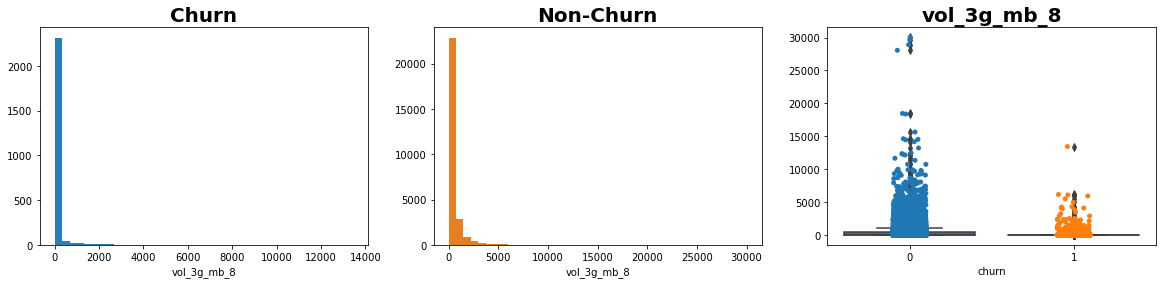

In [67]:
dist_box_plot(df,'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')

We can see same trend here as 3g data volume in Mb usage decreased in 8th month (for churn customers)

### arpu_3g 
(Avg Revenue per user from 3g data)

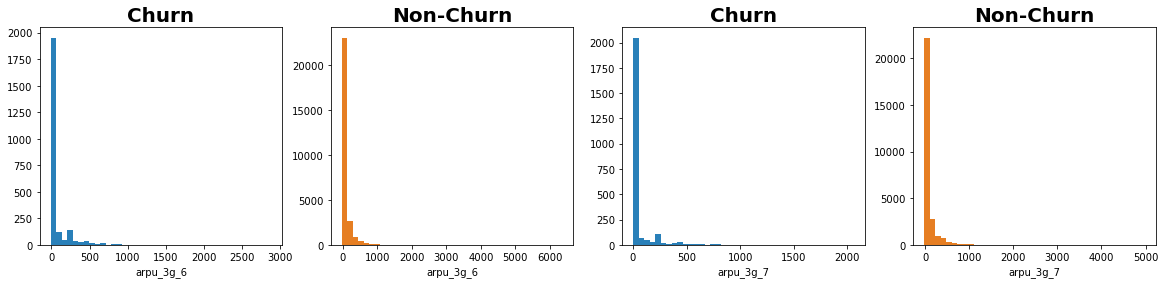

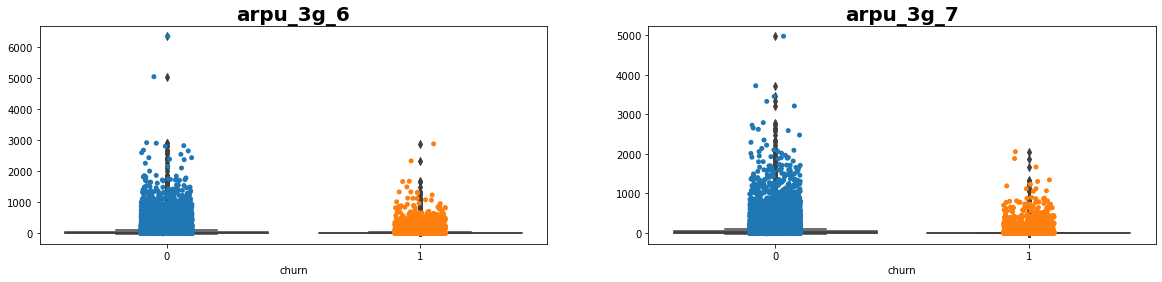

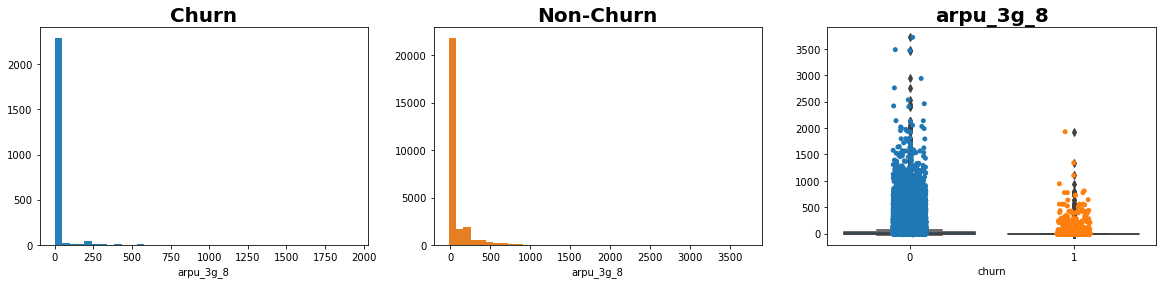

In [68]:
dist_box_plot(df,'arpu_3g_6','arpu_3g_7','arpu_3g_8')

Significant drop in Avg Revenue per user from 3g data in 8th month for churn customers

### vbc_month 
(Volume based cost - when no specific scheme is not purchased and paid as per usage)

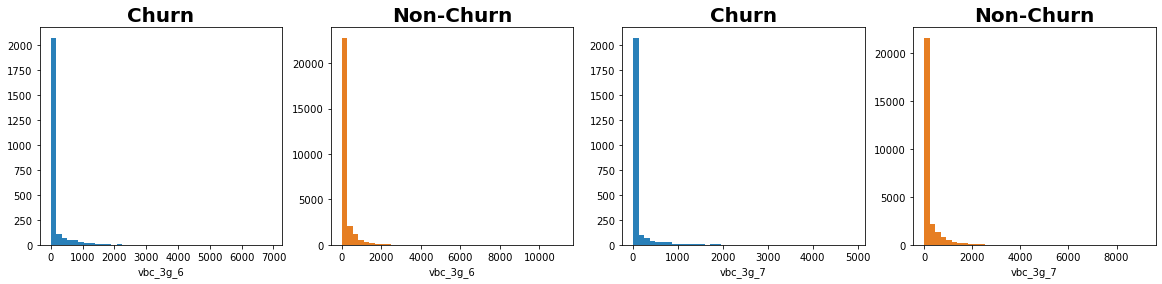

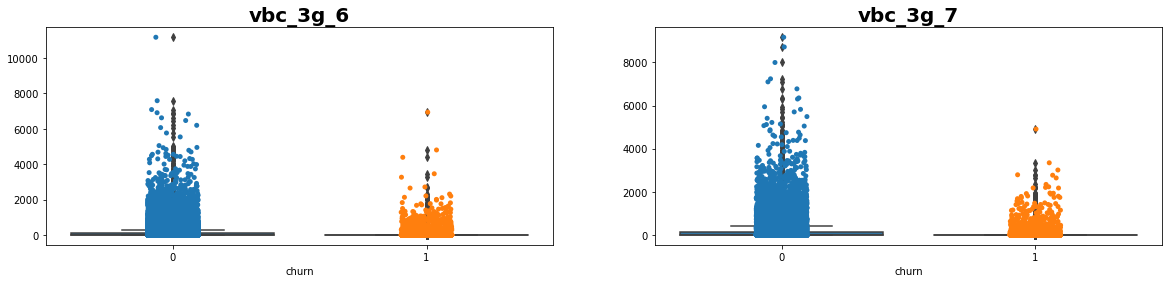

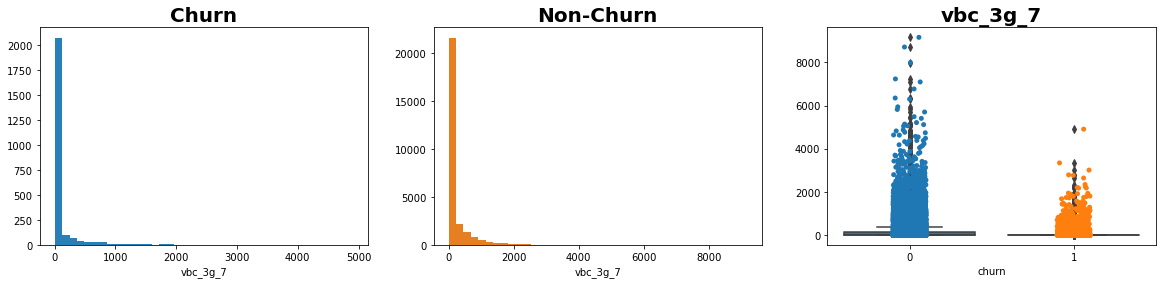

In [69]:
dist_box_plot(df,'vbc_3g_6','vbc_3g_7','vbc_3g_7')

Decrease in Volume based cost - when no specific scheme is not purchased and paid as per usage in 8th month for churn customers

### total_rech_num 
(Total no of recharges)

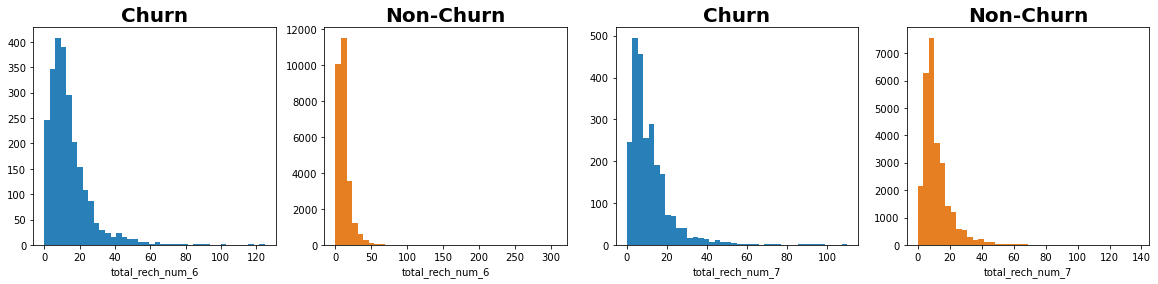

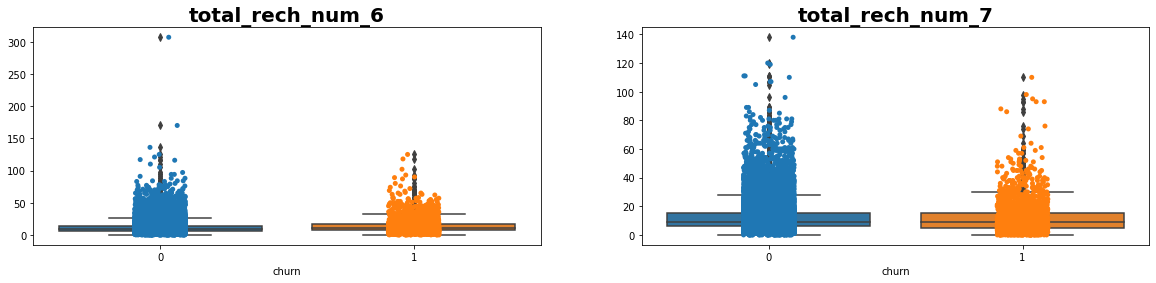

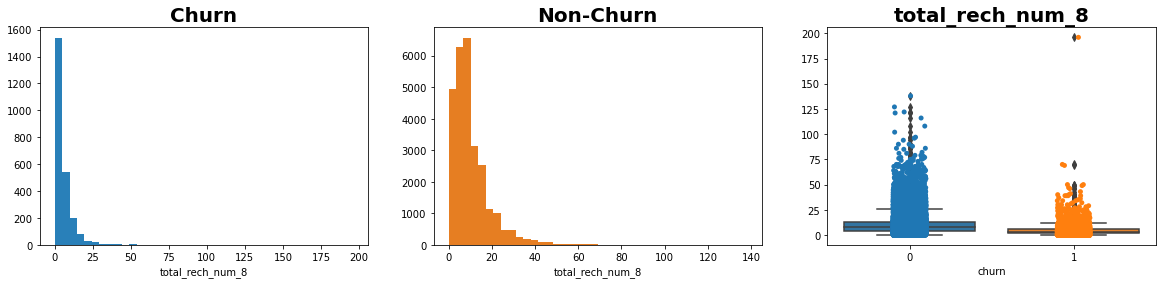

In [70]:
dist_box_plot(df,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

it was obvious to get reduced number of recharges, for the customers who churned as they reduced using any other services through telecom.

### aon
(Age on network - number of days the customer is using the operator T network)

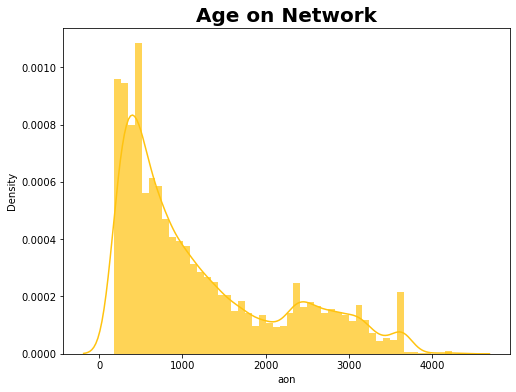

In [71]:
plt.figure(figsize=(8,6))
ax=sns.distplot(df['aon'],color='#FFC30F',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

For most of the customers Age on Network is around 800-900 days. 

There are outliers too as the maximum value is 4321.

## Categorical columns

In [72]:
cat_col = ["night_pck_user_6", 'night_pck_user_7', 'night_pck_user_8',
          'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
           'fb_user_6', 'fb_user_7', 'fb_user_8']

In [73]:
# Getting Columns with certain Value (not continous values) with Insignificant Frequency
for col in df.columns:
    if (len(df[col].unique()) <= 10):
        print(df[col].value_counts())
        print(f"\n{35 * '-'}")

0.000    29594
1.000      407
Name: night_pck_user_6, dtype: int64

-----------------------------------
0.000    29626
1.000      375
Name: night_pck_user_7, dtype: int64

-----------------------------------
0.000    29660
1.000      341
Name: night_pck_user_8, dtype: int64

-----------------------------------
0.000    25394
1.000     4021
2.000      551
3.000       28
4.000        7
Name: monthly_2g_6, dtype: int64

-----------------------------------
0.000    25241
1.000     4071
2.000      649
3.000       33
4.000        5
5.000        2
Name: monthly_2g_7, dtype: int64

-----------------------------------
0.000    25854
1.000     3737
2.000      370
3.000       30
4.000        8
5.000        2
Name: monthly_2g_8, dtype: int64

-----------------------------------
1.000    15525
0.000    14476
Name: fb_user_6, dtype: int64

-----------------------------------
1.000    15722
0.000    14279
Name: fb_user_7, dtype: int64

-----------------------------------
0.000    15688
1.000    14313

### Night pack user

<Figure size 720x432 with 0 Axes>

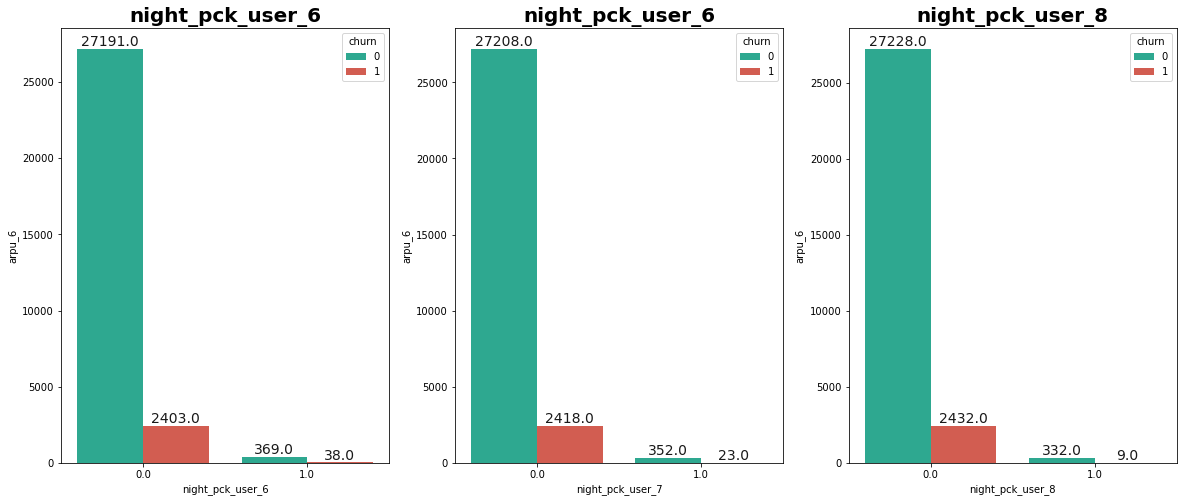

In [74]:
plt.figure(figsize=(10,6))

color=['#1ABC9C','#E74C3C']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))

df_temp= pd.DataFrame(df.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['night_pck_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['night_pck_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('night_pck_user_8',fontweight='bold',size=20)

plt.show()

ARPU is increasing from 6th to 8th month for churn customers who hasn't taken Night Pack service. And ARPU is getting decreased from 6th to 8th month for night pack users.

Means moslty churn customers have stopped their night pack facility.

### Fb User

<Figure size 720x432 with 0 Axes>

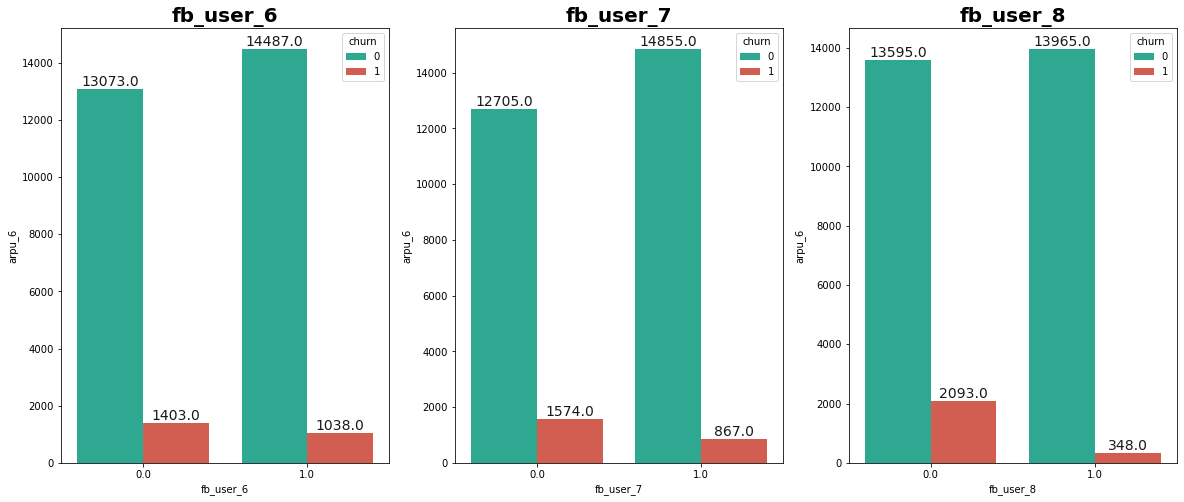

In [75]:
plt.figure(figsize=(10,6))

color=['#1ABC9C','#E74C3C']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))

df_temp= pd.DataFrame(df.groupby(['fb_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('fb_user_6',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['fb_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('fb_user_7',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['fb_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('fb_user_8',fontweight='bold',size=20)

plt.show()

Significant drop in average revenue in 8th month (churn customers)  for the users who are avaialing fb_user facility.

However ARPU is increasing for churn users who arent avaialing fb_users facility.

After Doing analysis, we came to a decision to drop some columns.

In [76]:
df.shape

(30001, 152)

In [77]:
df.head(1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_amt_spnd_6,total_data_rech_amt_7,total_amt_spnd_7,avg_amt_6&7,arpu_diff,churn
0,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.000,0.000,4.130,0.000,0.000,1.150,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,2.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,212.170,212.170,212.170,212.170,212.170,212.170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,968,30.400,0.000,101.200,252.000,614.000,252.000,504.000,559.000,7.702,1


## Feature Engineering

In [78]:
# Function to plot columns related to minutes of usage with month
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(df.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

### Creating derived features: 
- og_to_ic_mou_6
- og_to_ic_mou_7
- og_to_ic_mou_8 

These features will hold the ratio (=total_ogmou / total_icmou) for each month.

These features will combine both incoming and outgoing informations and should be a better predictor of churn.

In [79]:
# Creating new features which are ratio of total outgoing call with total incoming calls minutes of usage.
for i in range(6,9):
    df['tot_og_to_ic_mou_'+str(i)] = (df['total_og_mou_'+str(i)])/(df['total_ic_mou_'+str(i)]+1)

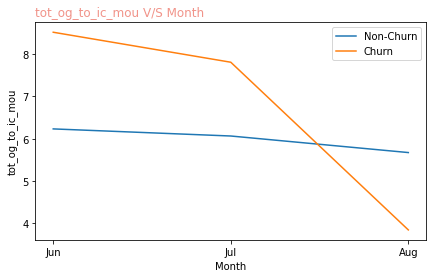

In [80]:
plot_Churn(df,'tot_og_to_ic_mou')

As the ratio of 'outgoing to incoming' seems to be getting dropped for churn customer , we can say "incoming calls" were less in **Jun** and singificantly increases which cause the ratio to drop.

### Creating derived features: 
- loc_og_to_ic_mou_6
- loc_og_to_ic_mou_7
- loc_og_to_ic_mou_8 

These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. 

These features will combine the local calls, both incoming and outgoing informations and should be a better predictor of churn.

In [81]:
# Creating new features which are ratio of local outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    df['loc_og_to_ic_mou_'+str(i)] = (df['loc_og_mou_'+str(i)])/(df['loc_ic_mou_'+str(i)]+1)

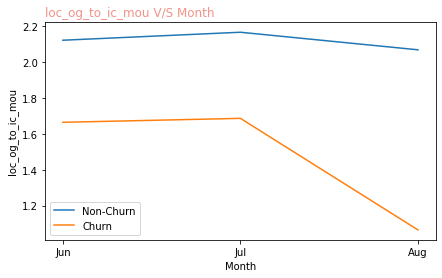

In [82]:
plot_Churn(df,'loc_og_to_ic_mou')

Ratio is getting dropped for churn customers

### Creating derived features:
- roam_og_to_ic_mou_6
- roam_og_to_ic_mou_7
- roam_og_to_ic_mou_8 

These features will hold the ratio (=roam_og_mou / roam_ic_mou) for each month. 

These features will combine the roaming calls, both incoming and outgoing informations and should be a better predictor of churn.

In [83]:
# Creating new features which are ratio of roaming outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    df['roam_og_to_ic_mou_'+str(i)] = (df['roam_og_mou_'+str(i)])/(df['roam_ic_mou_'+str(i)]+1)

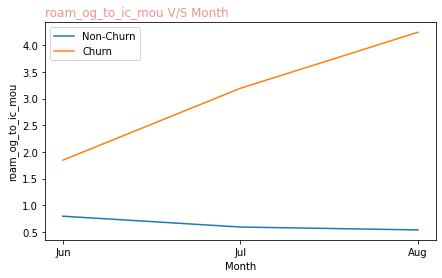

In [84]:
plot_Churn(df,'roam_og_to_ic_mou')

it is showing a rising trend for churn customer. 

Maybe this can be a reason that customer travelling a lot from one state to another state because of this they try to change telecom partner.

### Creating derived features: 
- std_og_to_ic_mou_6
- std_og_to_ic_mou_7
- std_og_to_ic_mou_8 

These features will hold the ratio (=std_og_mou / std_ic_mou) for each month. 

These features will combine the std calls, both incoming and outgoing informations and should be a better predictor of churn.

In [85]:
# Creating new features which are ratio of std outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    df['std_og_to_ic_mou_'+str(i)] = (df['std_og_mou_'+str(i)])/(df['std_ic_mou_'+str(i)]+1)

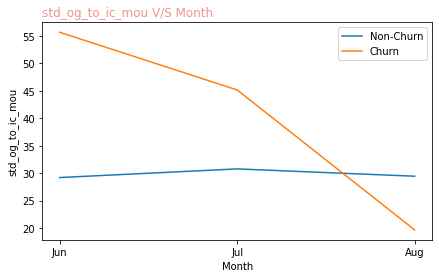

In [86]:
plot_Churn(df,'std_og_to_ic_mou')

### Creating derived features: 
- isd_og_to_ic_mou_6
- isd_og_to_ic_mou_7
- isd_og_to_ic_mou_8 

These features will hold the ratio (=isd_og_mou / isd_ic_mou) for each month. 

These features will combine the isd calls, both incoming and outgoing informations and should be a better predictor of churn.

In [87]:
# Creating new features which are ratio of isd outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    df['isd_og_to_ic_mou_'+str(i)] = (df['isd_og_mou_'+str(i)])/(df['isd_ic_mou_'+str(i)]+1)

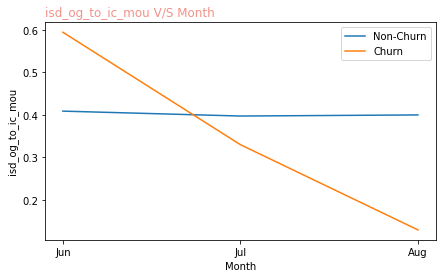

In [88]:
plot_Churn(df,'isd_og_to_ic_mou')

### Creating derived features: 
- spl_og_to_ic_mou_6
- spl_og_to_ic_mou_7 
- spl_og_to_ic_mou_8 

These features will hold the ratio (=spl_og_mou / spl_ic_mou) for each month. 

These features will combine the Special calls, both incoming and outgoing informations and should be a better predictor of churn.

In [89]:
# Creating new features which are ratio of Special outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    df['spl_og_to_ic_mou_'+str(i)] = (df['spl_og_mou_'+str(i)])/(df['spl_ic_mou_'+str(i)]+1)

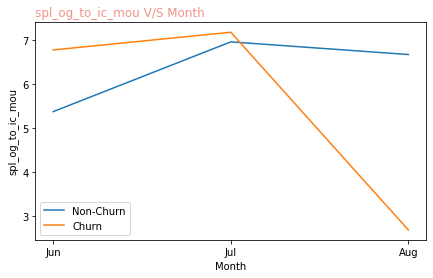

In [90]:
plot_Churn(df,'spl_og_to_ic_mou')

### Creating derived features: 
- total_vol_data 
- Combining vol_2g_mb and vol_3g_mb. 

These features will combine the 2g data usage and 3g data usage and should be a better predictor of churn.

In [91]:
# Creating new features combining 2g and 3g
for i in range(6,9):
    df['total_vol_'+str(i)] = (df['vol_2g_mb_'+str(i)])+(df['vol_3g_mb_'+str(i)])

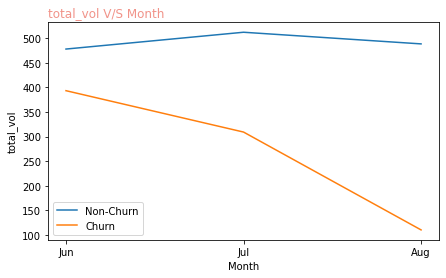

In [92]:
plot_Churn(df,'total_vol')

Total data volume decreases for churn customer decreases as we go from jun to Aug.

### Creating derived features: 
- total_arpu 
- Combining arpu_2g and arpu_3g. 

These features will combine the average revenue per user from 2g and 3g data and should be a better predictor of churn.

In [93]:
# Creating new features combining average revenue per user from 2g and 3g
for i in range(6,9):
    df['total_arpu_'+str(i)] = (df['arpu_3g_'+str(i)])+(df['arpu_3g_'+str(i)])

In [94]:
catg =['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',
       'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',
       'night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','fb_user_8']
catg1 =['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7',
       'night_pck_user_8','monthly_2g_8','sachet_2g_8',
       'monthly_3g_8','sachet_3g_8','fb_user_8']
num_col = list(set(df.columns).difference(set(catg)))

Creating new features which will be average of all columns for 6th, 7th

In [95]:
#filtering columns name by removing only last charcter of column name
col_list = df.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6&7','og_others_6'],axis=1).columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    col_name = 'avg67_'+col # lets create the column name dynamically
    col6 = col+'_6'
    col7 = col+'_7'
    df[col_name] = round((df[col6]  + df[col7])/ 2,2)

In [96]:
## Deriving columns difference between 8 month column and avg of 6th and 7th column calculated above
col_list1 = df.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='avg67_').columns
col_list2 = df.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='_8').drop(['fb_user_8','night_pck_user_8'],axis=1).columns
for col1,col2 in zip(col_list1,col_list2):
    col_name=col2[:-2]+'_avgdiff8'
    df[col_name]=df[col2]-df[col1]

In [97]:
#Dropping those columns since we already created features from it(dropping because of multicollinearity)
col_list = df.select_dtypes(include=['float64',\
                'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6&7','og_others_6'],axis=1).columns
df.drop(col_list,axis=1,inplace=True)
num_col = list(set(df.columns).difference(set(catg)))

### Creating dummy variables for categorical variables

In [98]:
dummy_df=pd.get_dummies(df[catg],drop_first=True)
df=pd.concat([df,dummy_df],axis=1)
df= df.drop(catg,axis=1)

## Handling Skewness

In [99]:
# Lets find out if numerical predictor variables are largely skewed or not
df_numerical=df[num_col]
skew_features = df_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
pd.DataFrame(skew_features,columns=['Skewness']).head(10)


,Skewness
roam_og_to_ic_mou_8,168.413
avg67_isd_og_to_ic_mou,153.331
isd_og_to_ic_mou_8,148.631
og_others_6,110.059
avg67_roam_og_to_ic_mou,108.072
og_others_8,100.174
isd_og_mou_8,89.544
avg67_isd_og_mou,89.489
avg67_og_others,81.755
avg67_spl_ic_mou,58.102


As we can see from skewness values, predictor variables are highly skewed. We need to take care of skewness.

In [100]:
#Removing Skewness
num_col.remove('churn')
qntle_trnsfrm=QuantileTransformer()
df[num_col]= qntle_trnsfrm.fit_transform(df[num_col])

## Train & Test Split

In [101]:
X=df.drop('churn',axis=1) #Independent/predictor variable
y=df['churn'] #output variables
randm_state= 42 # fixing random state to use same state wherever applicable

In [102]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randm_state)
print(X_train.shape)
print(X_test.shape)

(24000, 158)
(6001, 158)


#### Handling Imbalance Dataset

In [103]:
smt = SMOTE()
X_train,y_train = smt.fit_sample(X_train,y_train)

#### Scaling

In [104]:
# scaling using StandardScaler scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X=scaler.fit_transform(X)

#### Applying PCA

In [105]:
# We are going with PCA 0.9 variance or 90% information
pca=PCA(0.9)
df_train=pca.fit_transform(X_train)
df_train.shape

(44050, 42)

<AxesSubplot:>

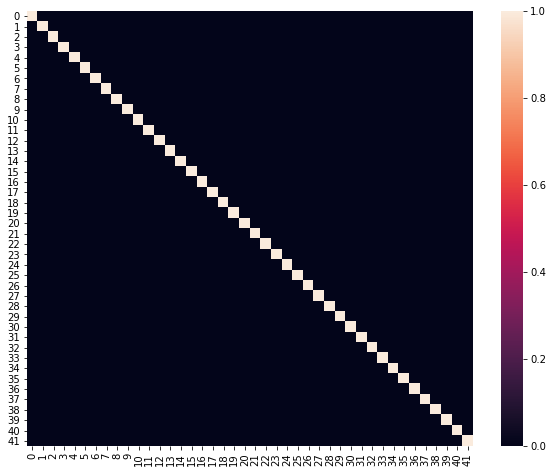

In [106]:
# Lets see correlation between these new PCA  features
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(df_train).corr())

All principal components are independent to each other

In [107]:
#intializing PCA with n_components= 40
pca=PCA(n_components=40,random_state=randm_state,svd_solver='randomized')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [108]:
#transforming X also using PCA, since we will use it during cross validation
pca=PCA(n_components=40,random_state=42,svd_solver='randomized')
X_pca=pca.fit_transform(X)

In [109]:
#Function to plot accuracy metrics
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration
    metrics_df = pd.DataFrame(data=[[acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'],index=['score'])
    return metrics_df

### Data Modelling

In [110]:
# Function to predict class labels based on model predicted probabilty and cutoff/threshold for assigning labels
def predictChurnlabeloncutoff(model,X,y,threshold=0.5):
    pred_probs = model.predict_proba(X)[:,1]
    pred_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>threshold else 0
    pred_df['predicted'] = pred_df.churn_Prob.map( lambda x: 1 if x > threshold else 0)
    return pred_df

In [111]:
def optimal_cutoff(df):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','specificity'])
    from sklearn.metrics import confusion_matrix

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        
        cm1 = confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','recall','specificity'],figsize=(8,6))
    plt.show()

We want to predict customers who are likely to churn(positive class). 

Hence, we want to maximize(Recall/Senstivity). Also, we don't want to drop accuracy or roc_auc value much while maximising recall.

In short we want a model which has to be high on accuracy with maximum Recall/ sensitivity value, because predicting churn customers are more important here.

### Logistic Regression 
(Default parameters)

In [112]:
log_reg= LogisticRegression(random_state=randm_state,class_weight='balanced')
log_reg.fit(X_train_pca,y_train) #fitting model
y_test_pred=log_reg.predict(X_test_pca) #model prediction
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5535
           1       0.34      0.83      0.48       466

    accuracy                           0.86      6001
   macro avg       0.66      0.85      0.70      6001
weighted avg       0.93      0.86      0.88      6001



,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.860,0.850,0.140,0.860,0.830,388,4770,765,78


### Logistic Regression
(using K-Fold validation)

In [113]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=5) 

In [114]:
params={'penalty':['l1'],'C':list(np.power(10.0, np.arange(-2, 3))),'solver':('saga','liblinear'),\
                                          'class_weight':['balanced']}
#we are using scoring metrics Recall
log_regcv=GridSearchCV(LogisticRegression(random_state=randm_state,max_iter=1000),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
log_regcv.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': ['balanced'], 'penalty': ['l1'],
                         'solver': ('saga', 'liblinear')},
             return_train_score=True, scoring='recall', verbose=1)

In [115]:
print(log_regcv.best_params_)
print(log_regcv.best_score_)
print(log_regcv.best_estimator_)
# test set prediction using tuned model
log_regcv=log_regcv.best_estimator_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.8495800227014756
LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')


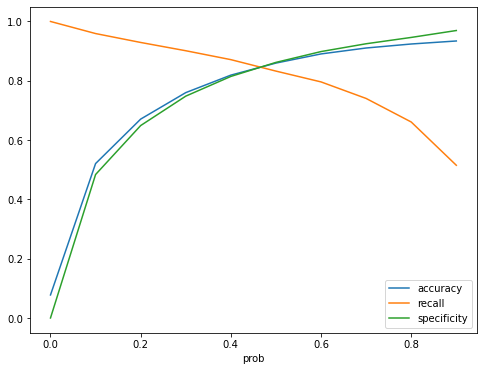

In [116]:
log_regcv.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test)
optimal_cutoff(df_cutoff)

In [117]:
threshold=0.47 # from the above graph(recall, accuracy and specificity have good score)
y_test_pred= predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      5535
           1       0.32      0.85      0.47       466

    accuracy                           0.85      6001
   macro avg       0.65      0.85      0.69      6001
weighted avg       0.93      0.85      0.88      6001

Confusion Matrix:

[[4710  825]
 [  70  396]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.850,0.850,0.150,0.850,0.850,396,4710,825,70


### KNN 
(Using Default paramters)

In [118]:
knn=KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_test_pred = knn.predict(X_test_pca)
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5535
           1       0.27      0.82      0.41       466

    accuracy                           0.82      6001
   macro avg       0.63      0.82      0.65      6001
weighted avg       0.93      0.82      0.85      6001

Confusion Matrix:

[[4518 1017]
 [  82  384]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.820,0.820,0.180,0.820,0.820,384,4518,1017,82


### KNN 
(Tuned Hyperameters)

In [119]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3) #stratified kfold for cross validation
#params={'n_neighbors': list(range(1,6)), 'p':[1,2],'weights':['uniform', 'distance']}
# Setting params to tuned values, since it takes around 3hrs for 30 fits with knn
params={'n_neighbors':[4], 'p':[2]} #I ran gridsearchcv on above paramgerids with 30 fits and found these tuned params
#we are using scoring metrics Recall
knn_cv=GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
knn_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4], 'p': [2]}, return_train_score=True,
             scoring='recall', verbose=1)

In [120]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(knn_cv.best_estimator_)
# test set prediction using tuned model
knn_cv=knn_cv.best_estimator_ # best parameters value for knn

{'n_neighbors': 4, 'p': 2}
0.999001137131183
KNeighborsClassifier(n_neighbors=4)


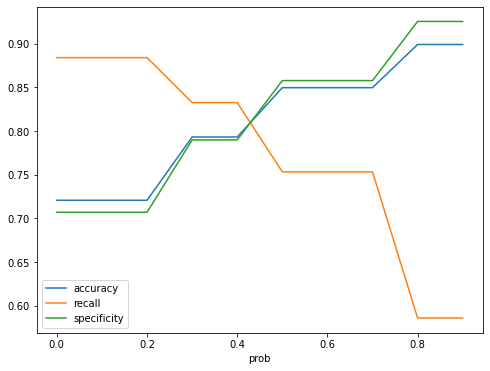

In [121]:
knn_cv.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(knn_cv,X_test_pca,y_test)
optimal_cutoff(df_cutoff)

In [122]:
threshold=0.4 #from graph, at 0.4 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(knn_cv,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      5535
           1       0.25      0.83      0.38       466

    accuracy                           0.79      6001
   macro avg       0.62      0.81      0.63      6001
weighted avg       0.93      0.79      0.84      6001

Confusion Matrix:

[[4372 1163]
 [  78  388]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.790,0.810,0.210,0.790,0.830,388,4372,1163,78


### Random Forest
(Default parameters)

In [123]:
rfc=RandomForestClassifier(random_state=randm_state)
rfc.fit(X_train_pca,y_train)
y_test_pred= rfc.predict(X_test_pca)
model_metrics(y_test,y_test_pred)

,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.930,0.790,0.040,0.960,0.620,291,5300,235,175


### Random Forest
(Tuned Hyperparameters)

Tuning all hyperparametrs will take large amount of time beacuse of possible combination will for gridsearchcv will be very large. 

Hence, we are tuning 1 or 2 hyperparamters at a time.

`Tuning n_estimators and criterion`

In [124]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'n_estimators': range(50,150,30)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'n_estimators': range(50, 150, 30)},
             return_train_score=True, scoring='recall', verbose=1)

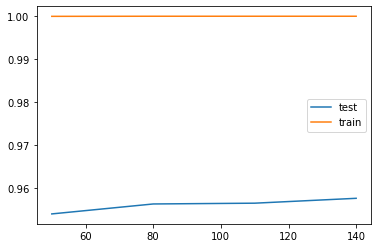

In [125]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_n_estimators'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_n_estimators'],cv_results['mean_train_score'],label='train')
plt.legend()

`Taking 80 as n_estimators.`

In [126]:
params={'criterion': ["gini", "entropy"]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',n_estimators=80),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='recall', verbose=1)

In [127]:
rfc_cv.best_params_

{'criterion': 'entropy'}

`Tuning max_features`

In [128]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'max_features': [5, 10, 15, 20, 25]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 22.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'max_features': [5, 10, 15, 20, 25]},
             return_train_score=True, scoring='recall', verbose=1)

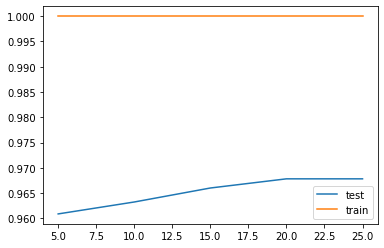

In [129]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_max_features'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_max_features'],cv_results['mean_train_score'],label='train')
plt.legend()

`Tunning minimum sample leaf`

In [133]:
params={'min_samples_leaf': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=20),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 10.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=20, n_estimators=80,
                                              random_state=42),
             param_grid={'min_samples_leaf': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [135]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'min_samples_leaf': 50}
0.8717823456725666


`Tunning minimum sample split`

In [136]:
params={'min_samples_split': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15,min_samples_leaf=50,\
                                          ),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=15,
                                              min_samples_leaf=50,
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'min_samples_split': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

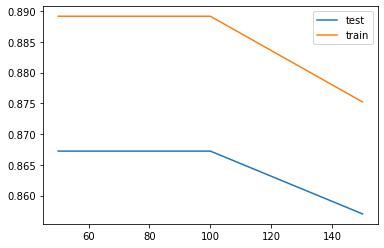

In [137]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_train_score'],label='train')
plt.legend()

going with 100 samples to take care of overfitting.

### Tuned Random Forest

In [138]:
rfc=RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15,min_samples_leaf=50,\
                                          min_samples_split=100)
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=15, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=80, random_state=42)

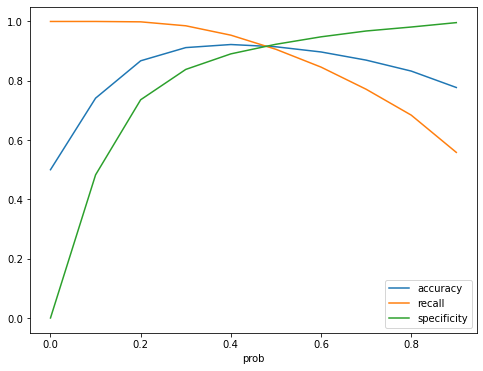

In [139]:
#rfc.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(rfc,X_train_pca,y_train)
optimal_cutoff(df_cutoff)

In [140]:
# We want recall to be better so going with 0.34, as you can see above from the at 0.34 recall is slightly better than accuracy and specificty
threshold=0.34 #from graph, at 0.34 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(rfc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5535
           1       0.32      0.86      0.47       466

    accuracy                           0.85      6001
   macro avg       0.65      0.85      0.69      6001
weighted avg       0.93      0.85      0.88      6001

Confusion Matrix:

[[4676  859]
 [  63  403]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.850,0.850,0.160,0.840,0.860,403,4676,859,63


### SVM (default parameters)


In [141]:
svc= SVC(random_state=randm_state,class_weight='balanced')
svc.fit(X_train_pca,y_train) #fitting model
y_test_pred=svc.predict(X_test_pca) #model prediction
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5535
           1       0.46      0.74      0.57       466

    accuracy                           0.91      6001
   macro avg       0.72      0.83      0.76      6001
weighted avg       0.94      0.91      0.92      6001



,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.910,0.830,0.070,0.930,0.740,345,5131,404,121


### SVM(Tuned Hyperparameters)

In [142]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'C':list(np.power(10.0, np.arange(-1, 2)))}
#we are using scoring metrics Recall
svc_cv=GridSearchCV(SVC(random_state=randm_state,class_weight='balanced'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
svc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0]}, return_train_score=True,
             scoring='recall', verbose=1)

In [143]:
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 10.0}
0.997956867187944


In [144]:
params={'kernel' :['poly', 'rbf']}
#we are using scoring metrics Recall
svc_cv=GridSearchCV(SVC(random_state=randm_state,class_weight='balanced',C=10),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
svc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(C=10, class_weight='balanced', random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, return_train_score=True,
             scoring='recall', verbose=1)

#### Tuned SVC

In [145]:
svc= SVC(random_state=randm_state,class_weight='balanced',C=0.1,kernel='rbf',probability=True)
svc.fit(X_train_pca,y_train) #fitting model
y_train_pred=svc.predict_proba(X_train_pca) #model prediction

In [146]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.40 #from graph, at 0.4 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(svc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      5535
           1       0.38      0.83      0.52       466

    accuracy                           0.88      6001
   macro avg       0.68      0.86      0.73      6001
weighted avg       0.94      0.88      0.90      6001

Confusion Matrix:

[[4903  632]
 [  81  385]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.880,0.860,0.110,0.890,0.830,385,4903,632,81


### Gradient Boosting

In [147]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_pca,y_train)
y_train_pred = gbc.predict_proba(X_train_pca)

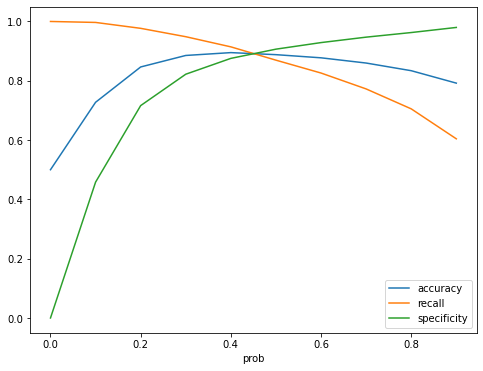

In [148]:
df_cutoff=predictChurnlabeloncutoff(gbc,X_train_pca,y_train)
optimal_cutoff(df_cutoff)

In [149]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.3 #from graph, at 0.3 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(gbc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5535
           1       0.28      0.87      0.42       466

    accuracy                           0.81      6001
   macro avg       0.63      0.84      0.66      6001
weighted avg       0.93      0.81      0.85      6001

Confusion Matrix:

[[4482 1053]
 [  60  406]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.810,0.840,0.190,0.810,0.870,406,4482,1053,60


###  XGBoost Model (Tuned)

In [150]:
xgb=XGBClassifier(random_state=randm_state ,max_depth = 3 , learning_rate=0.01,\
                  n_estimators=100,objective='binary:logistic')
xgb.fit(X_train_pca,y_train)
y_train_pred = xgb.predict_proba(X_train_pca)

[22:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


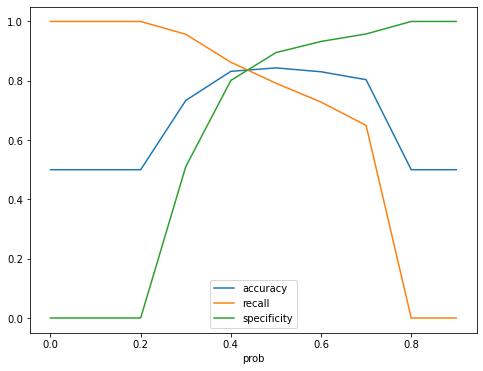

In [151]:
df_cutoff=predictChurnlabeloncutoff(xgb,X_train_pca,y_train) #optimal cutoff
optimal_cutoff(df_cutoff)

In [152]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.41 #from graph, at 0.42 we can have good score for recall, accuracy and specificity
y_test_pred= predictChurnlabeloncutoff(xgb,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5535
           1       0.27      0.83      0.41       466

    accuracy                           0.81      6001
   macro avg       0.63      0.82      0.65      6001
weighted avg       0.93      0.81      0.85      6001

Confusion Matrix:

[[4480 1055]
 [  79  387]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.810,0.820,0.190,0.810,0.830,387,4480,1055,79


## Summary of Models
model used to find Maximum Recall, high Accuracy & least False Positive.

In [183]:
# initialise data of lists.
data = {'Model_Name':['Logistic Regression (Default parameters)', 'Logistic Regression(using K-Fold validation)', 'KNN', 'KNN (Tuned Hyperameters)', 'Random Forest (Default parameters)', 'Random Forest (Tuned Hyperparameters)', "SVM (default parameters)", 'SVM (Tuned Hyperparameters)', 'Gradient Boosting', 'XGBoost Model (Tuned)'],
        'Accuracy':[0.86, 0.85, 0.82, 0.79, 0.93, 0.85, 0.91, 0.88, 0.81, 0.81],
        'roc_auc' :[0.85, 0.85, 0.82, 0.81, 0.79, 0.85, 0.83, 0.86, 0.84, 0.82],
        'recall_score' : [0.83, 0.85, 0.82, 0.83, 0.62, 0.86, 0.74, 0.83, 0.87, 0.83],
        'specificity': [0.86, 0.85, 0.82, 0.79, 0.96, 0.84, 0.93, 0.89, 0.81, 0.81],
        'true_positive': [388, 396, 384, 388, 291, 403, 345, 385, 406, 387],
        'true_negative': [4470, 4710, 4572, 4372, 5300, 4676, 5131, 4903, 4482, 4480],
        'false_positive': [765, 825, 1017, 1163, 235, 859, 404, 632, 1053, 1055],
        'false_negative': [78, 70, 82, 78, 175, 63, 121, 81, 60, 79]}
 
# Create DataFrame
Accuracy_model = pd.DataFrame(data)
 
# Print the output.
Accuracy_model

,Model_Name,Accuracy,roc_auc,recall_score,specificity,true_positive,true_negative,false_positive,false_negative
0,Logistic Regression (Default parameters),0.860,0.850,0.830,0.860,388,4470,765,78
1,Logistic Regression(using K-Fold validation),0.850,0.850,0.850,0.850,396,4710,825,70
2,KNN,0.820,0.820,0.820,0.820,384,4572,1017,82
3,KNN (Tuned Hyperameters),0.790,0.810,0.830,0.790,388,4372,1163,78
4,Random Forest (Default parameters),0.930,0.790,0.620,0.960,291,5300,235,175
5,Random Forest (Tuned Hyperparameters),0.850,0.850,0.860,0.840,403,4676,859,63
6,SVM (default parameters),0.910,0.830,0.740,0.930,345,5131,404,121
7,SVM (Tuned Hyperparameters),0.880,0.860,0.830,0.890,385,4903,632,81
8,Gradient Boosting,0.810,0.840,0.870,0.810,406,4482,1053,60
9,XGBoost Model (Tuned),0.810,0.820,0.830,0.810,387,4480,1055,79


Models has maximum recall and least False Negative : 
- Gradient Boosting                        87% with accuracy of 81% (FN = 60)
- Random Forest (Tuned Hyperparameters)    86% with accuracy of 85% (FN = 63)

Models has maximum Accuracy :
- Random Forest (Default parameters)  93%
- SVM (default parameters)  91%

**According to our Business Goal** 

our main focus is to figure out **Maximum Churn Customers** accurately instead of getting **Maximum Overall Accuracy** 

So, we chose `*Random Forest (Tuned Hyperparameters)*` cause it has satisfied all the parameters that we were looking for.

Next We will impelement interpretable model in this notebook. Since, PCA does transformation of original raw attrinutes to find new variables or Principal components which are orthogonal and uncorrelated to each other. Hence, these model features cannot be used for business for interpretation purpose.

## Interpretable model for Business understanding

Building another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. 

A good choice to identify important variables is a logistic regression model, Decision Tree model and Random Forest classifier. 

Here, we choose to go with Logistic Regression cause it is highly interpretable when it comes to figure out a large number of Variables/columns.

### Logistic Regression

In [153]:
X=df.drop('churn',axis=1) # Feature variables for new interpretable models
y=df['churn'] 
print(X.shape)

(30001, 158)


In [154]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = randm_state)
print(df_train.shape)
print(df_test.shape)

(21000, 159)
(9001, 159)


In [155]:
y_train = df_train['churn']
X_train = df_train.drop('churn',axis=1)
y_test = df_test['churn']
X_test = df_test.drop('churn',axis=1)

In [156]:
# Scaling
scaler = StandardScaler()
colums = list(X_train.columns)
X_train[colums] = scaler.fit_transform(X_train[colums])
X_test[colums] = scaler.transform(X_test[colums])

In [157]:
log_reg=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')
# Running RFE with the output number of the variable equal to 30
rfe = RFE(log_reg,20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [158]:
# assign the 50 features selected using RFE to a dataframe and view them

temporary_data=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temporary_data = temporary_data.loc[temporary_data['rfe_support'] == True]
temporary_data.reset_index(drop=True, inplace=True)
temporary_data

,Variable,rfe_support,rfe_ranking
0,isd_og_mou_8,True,1
1,loc_ic_t2t_mou_8,True,1
2,loc_ic_t2m_mou_8,True,1
3,loc_ic_mou_8,True,1
4,std_ic_mou_8,True,1
5,spl_ic_mou_8,True,1
6,total_rech_num_8,True,1
7,last_day_rch_amt_8,True,1
8,av_rech_amt_data_8,True,1
9,aon,True,1


In [159]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [160]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     445.9
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:10   Log-Likelihood:                 981.28
No. Observations:               21000   AIC:                            -1921.
Df Residuals:                   20979   BIC:                            -1754.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [161]:
# lets drop isd_og_mou_8 since it has high p value of 0.654  
X_train_rfe_new=X_train_rfe_new.drop('isd_og_mou_8',axis=1)

In [162]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.840
2,loc_ic_t2m_mou_8,15.890
13,total_vol_8,8.710
8,av_rech_amt_data_8,8.100
1,loc_ic_t2t_mou_8,4.920
10,tot_og_to_ic_mou_8,2.920
11,loc_og_to_ic_mou_8,2.250
6,total_rech_num_8,1.840
14,avg67_arpu,1.620
17,total_rech_num_avgdiff8,1.590


In [163]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     469.3
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:12   Log-Likelihood:                 981.18
No. Observations:               21000   AIC:                            -1922.
Df Residuals:                   20980   BIC:                            -1763.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [164]:
# lets drop vol_2g_mb_avgdiff8 since it has high p value of 0.469  
X_train_rfe_new=X_train_rfe_new.drop('vol_2g_mb_avgdiff8',axis=1)

In [165]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.840
2,loc_ic_t2m_mou_8,15.890
13,total_vol_8,8.450
8,av_rech_amt_data_8,8.060
1,loc_ic_t2t_mou_8,4.920
10,tot_og_to_ic_mou_8,2.890
11,loc_og_to_ic_mou_8,2.240
6,total_rech_num_8,1.770
17,total_rech_num_avgdiff8,1.590
14,avg67_arpu,1.560


In [166]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 980.92
No. Observations:               21000   AIC:                            -1924.
Df Residuals:                   20981   BIC:                            -1773.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [167]:
# lets drop vol_3g_mb_avgdiff8 since it has high p value of 0.297  
X_train_rfe_new=X_train_rfe_new.drop('vol_3g_mb_avgdiff8',axis=1)

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.830
2,loc_ic_t2m_mou_8,15.880
8,av_rech_amt_data_8,8.050
13,total_vol_8,8.050
1,loc_ic_t2t_mou_8,4.920
10,tot_og_to_ic_mou_8,2.880
11,loc_og_to_ic_mou_8,2.240
6,total_rech_num_8,1.770
17,total_rech_num_avgdiff8,1.590
14,avg67_arpu,1.550


In [168]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     524.5
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 980.37
No. Observations:               21000   AIC:                            -1925.
Df Residuals:                   20982   BIC:                            -1782.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [169]:
# lets drop av_rech_amt_data_8 since it has high p value of 0.285  
X_train_rfe_new=X_train_rfe_new.drop('av_rech_amt_data_8',axis=1)

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.830
2,loc_ic_t2m_mou_8,15.880
1,loc_ic_t2t_mou_8,4.920
9,tot_og_to_ic_mou_8,2.880
10,loc_og_to_ic_mou_8,2.230
6,total_rech_num_8,1.770
16,total_rech_num_avgdiff8,1.570
13,avg67_arpu,1.550
4,std_ic_mou_8,1.400
14,onnet_mou_avgdiff8,1.250


In [170]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     557.2
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 979.80
No. Observations:               21000   AIC:                            -1926.
Df Residuals:                   20983   BIC:                            -1790.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [171]:
# lets drop onnet_mou_avgdiff8 since it has high p value of 0.109  
X_train_rfe_new=X_train_rfe_new.drop('onnet_mou_avgdiff8',axis=1)

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.810
2,loc_ic_t2m_mou_8,15.870
1,loc_ic_t2t_mou_8,4.920
9,tot_og_to_ic_mou_8,2.870
10,loc_og_to_ic_mou_8,2.230
6,total_rech_num_8,1.770
13,avg67_arpu,1.510
15,total_rech_num_avgdiff8,1.510
4,std_ic_mou_8,1.400
7,last_day_rch_amt_8,1.220


In [172]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     594.1
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 978.52
No. Observations:               21000   AIC:                            -1925.
Df Residuals:                   20984   BIC:                            -1798.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

As there is no column left whose p-value is greater then 0.05 which means all the left columns/variables are significant.

let's `handle Multicollinearity` with the help of `VIF`

In [173]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,25.810
2,loc_ic_t2m_mou_8,15.870
1,loc_ic_t2t_mou_8,4.920
9,tot_og_to_ic_mou_8,2.870
10,loc_og_to_ic_mou_8,2.230
6,total_rech_num_8,1.770
13,avg67_arpu,1.510
15,total_rech_num_avgdiff8,1.510
4,std_ic_mou_8,1.400
7,last_day_rch_amt_8,1.220


In [174]:
# lets drop loc_ic_mou_8 since it has high VIF of 25.810  
X_train_rfe_new=X_train_rfe_new.drop('loc_ic_mou_8',axis=1)

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,tot_og_to_ic_mou_8,2.820
2,loc_ic_t2m_mou_8,2.370
9,loc_og_to_ic_mou_8,2.220
1,loc_ic_t2t_mou_8,2.000
5,total_rech_num_8,1.770
12,avg67_arpu,1.500
14,total_rech_num_avgdiff8,1.500
3,std_ic_mou_8,1.400
11,total_vol_8,1.220
13,loc_ic_t2m_mou_avgdiff8,1.220


In [175]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,tot_og_to_ic_mou_8,2.820
1,loc_ic_t2m_mou_8,2.370
8,loc_og_to_ic_mou_8,2.220
0,loc_ic_t2t_mou_8,2.000
4,total_rech_num_8,1.770
11,avg67_arpu,1.500
13,total_rech_num_avgdiff8,1.500
2,std_ic_mou_8,1.400
10,total_vol_8,1.220
12,loc_ic_t2m_mou_avgdiff8,1.220


now all the columns/variables are significant as well as there is no multicollinearity present in it.

In [176]:
X_train=X_train[X.columns]
X_test=X_test[X.columns]

In [177]:
log_reg=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

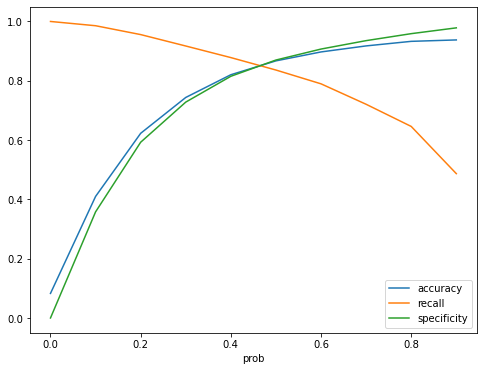

In [178]:
#optimal cutoff
df_cutoff=predictChurnlabeloncutoff(log_reg,X_train,y_train)
optimal_cutoff(df_cutoff)

In [179]:
#As we can see cutoff=0.45 given good recall score as well as accuracy and specificity.
threshold=0.45 #from graph, at 0.45 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(log_reg,X_test,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8300
           1       0.31      0.85      0.45       701

    accuracy                           0.84      9001
   macro avg       0.65      0.84      0.68      9001
weighted avg       0.93      0.84      0.87      9001

Confusion Matrix:

[[6965 1335]
 [ 105  596]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.840,0.840,0.160,0.840,0.850,596,6965,1335,105


According to our choise of model (Logistic Regression) we get :-
- Accuracy = 84%
- recall = 85%
- False Negative = 105

by which we can confidently say that the variables which we get are trust worthy.

In [186]:
feat_imp=log_reg.coef_
feat_imp=np.abs(feat_imp)
print("Total Number of Variables =", len(X_train.columns))

Total Number of Variables = 14


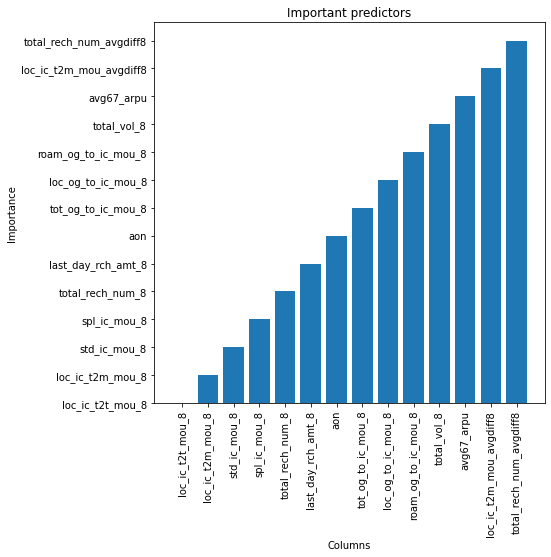

In [181]:
importances = list(X_train.columns)
%matplotlib inline
plt.figure(figsize = (7,7))   # Fig size
# list of x locations for plotting
x_values = list(range(len(importances))) 
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Columns'); plt.title('Important predictors');

In [182]:
df[importances].describe()

,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,aon,tot_og_to_ic_mou_8,loc_og_to_ic_mou_8,roam_og_to_ic_mou_8,total_vol_8,avg67_arpu,loc_ic_t2m_mou_avgdiff8,total_rech_num_avgdiff8
count,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000
mean,0.492,0.496,0.476,0.083,0.500,0.467,0.500,0.495,0.493,0.161,0.368,0.500,0.500,0.500
std,0.301,0.294,0.322,0.269,0.289,0.331,0.289,0.296,0.300,0.349,0.391,0.289,0.289,0.288
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.250,0.250,0.000,0.248,0.000,0.250,0.250,0.250,0.000,0.000,0.250,0.250,0.268
50%,0.500,0.500,0.500,0.000,0.531,0.531,0.500,0.500,0.500,0.000,0.000,0.500,0.500,0.513
75%,0.750,0.750,0.750,0.000,0.758,0.701,0.750,0.750,0.750,0.000,0.750,0.750,0.750,0.753
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


There is no scewness in the data and in the selected variables.

# Recommendations

> ### Business Insights 

> <span style='color:red'> Less number of **high value customer** are churing, but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect. </span>

> <span style='color:red'> Customers with less than **4 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group. 

> <span style='color:red'> **Average revenue per user** seems to be most important feature in determining churn prediction.

> <span style='color:red'> **Incoming** and **Outgoing Calls** on **romaing** for 8th month are strong indicators of churn behaviour

> <span style='color:red'> **Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

> <span style='color:red'> Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

> ### Model Insights 

> <span style='color:blue'> **Random Forest** with tuned hyperparameters produce best result on this dataset with 0.85 accuracy.

> <span style='color:blue'> **Gradient Boosting** also produce opt accuracy of  0.81 with no tuned hyperparameters.

> <span style='color:blue'> **As per our analysis Random Forest and Gradient Boosting produce best accuracy and models can be selected to predict churn data for future dataset or production.**